In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import plotly.express as px

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.model_selection import GridSearchCV
from math import sqrt


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge , ElasticNet

<h1>Exploratory Data Analysis </h1>

<h3>First look </h3>

In [112]:
#Comenzamos por leer los CSV files
df_train = pd.read_csv('./csv files/Train_BigMart.csv')
df_test=pd.read_csv('./csv files/Test_BigMart.csv')



In [113]:
df_train=df_train.rename(columns={'Unnamed: 0':'Item_Identifier'}) #No es el Index, toma distintos valores,
                                                                   
df_train.head() #primeros 5 rows (registros)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility   
0           FDA15         9.30          Low Fat         0.016047  \
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier   
0                  Dairy  249.8092            OUT049  \
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type   
0                       1999      Medium               Tier 1  \
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [114]:
df_test.head() #primeros 5 rows del df_test

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type   
0           FDW58       20.750          Low Fat         0.007565  Snack Foods  \
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size   
0  107.8622            OUT049                       1999      Medium  \
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [115]:
print(f'Las columnas son: \n {df_train.columns}')
print(f'La cantidad de columnas son: {len(df_train.columns)}')
print(f'La dimensión del Train set es: {df_train.shape}')
print(f'El Target es: Item_Outlet_Sales')
print('##################################################################')
print(f'Las columnas son: \n {df_test.columns}')
print(f'La cantidad de columnas son: {len(df_test.columns)}')
print(f'La dimensión del Test Set es: {df_test.shape}')

Las columnas son: 
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
La cantidad de columnas son: 12
La dimensión del Train set es: (8523, 12)
El Target es: Item_Outlet_Sales
##################################################################
Las columnas son: 
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')
La cantidad de columnas son: 11
La dimensión del Test Set es: (5681, 11)


In [116]:
df_train.describe() #veo medidas de variables numéricas:
                    #media, mediana, cuartiles, valor mínimo, máximo,etc

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year   
count  7060.000000      8523.000000  8523.000000                8523.000000  \
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [117]:
df_test.describe() #veo medidas de variables numéricas:
                    #media, mediana, cuartiles, valor mínimo, máximo,etc

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

In [118]:
df_train.info() #cantidad de null values y dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [119]:
df_test.info() #cantidad de null values y dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [120]:
df_train.isnull().sum()   #Item Weight y Outlet Size tienen null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [121]:
df_test.isnull().sum()    #Item Weight y Outlet Size tienen null values

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [122]:
#Ambos dos datasets tienen los mismos features con null values

print("""--------------Relación entre valores nulos de Item_Weight y ----------------------
                    cantidad de valores de Item_Weight \n""")
print(f"df_train: {df_train['Item_Weight'].isnull().sum()/len(df_train['Item_Weight'])}")

print(f"df_test:  {df_test['Item_Weight'].isnull().sum()/len(df_test['Item_Weight'])}")

print('######'*15)
print("""--------------Relación entre valores nulos de Outlet_Size y ----------------------
                    cantidad de valores de Outlet_Size \n""")
print(f"df_train: {df_train['Outlet_Size'].isnull().sum()/len(df_train['Outlet_Size'])}")

print(f"df_test:  {df_test['Outlet_Size'].isnull().sum()/len(df_test['Outlet_Size'])}")


--------------Relación entre valores nulos de Item_Weight y ----------------------
                    cantidad de valores de Item_Weight 

df_train: 0.1716531737651062
df_test:  0.17180073930646014
##########################################################################################
--------------Relación entre valores nulos de Outlet_Size y ----------------------
                    cantidad de valores de Outlet_Size 

df_train: 0.2827642848762173
df_test:  0.28269670832599897


In [123]:
df_train[df_train.duplicated()] #no duplicated rows

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []

In [124]:
df_test[df_test.duplicated()] #no duplicated rows

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type]
Index: []

* Hay 12 columnas (11 features y 1 target en el Train set)
* Item_Identifier no es el Index, es una categoría. Lo chequeé haciendo value_counts(), lo saqué para no hacerlo tan extenso.
*  No hay registros duplicados (no hay rows duplicadas).
*  La relación de los únicos valores nulos de los dos datasets es igual

<h3>Second Look</h3>

<h4> El Target</h4>

Para profundizar el análisis primero observaremos el Target(variable respuesta,variable dependiente) y su distribución. 

In [125]:
df_train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

A simple vista podemos ver que el target no tiene una distribución normal, ya que la mediana (50%) y la media(mean) divergen. Lo comprobamos de manera gráfica:

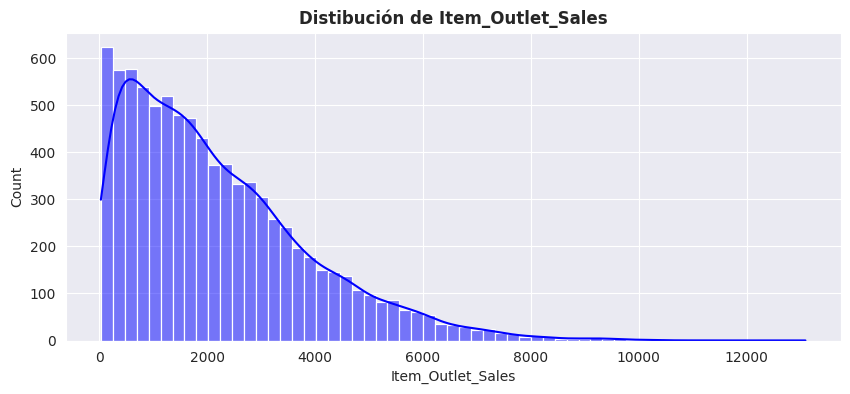

In [126]:
plt.figure(figsize=(10, 4))
plt.title('Distibución de Item_Outlet_Sales',weight='12',fontweight='bold')
sns.histplot(data=df_train,x='Item_Outlet_Sales',kde=True,color='blue')
plt.show()

In [127]:
print(f"Coeficiente de Asimetría:  {df_train['Item_Outlet_Sales'].skew()}")
print(f"Curtosis:  {df_train['Item_Outlet_Sales'].kurt()}")

Coeficiente de Asimetría:  1.1775306028542796
Curtosis:  1.6158766814287264


* El sesgo o asimetría (Skewness) sirve para medir la asimetría de la distribución del Target.
Como se puede observar en el gráfico, el target tiene una asimetría positiva, con cola hacia la izquierda. A su vez, esto se puede observar ya que el resultado del coeficiente de Asimetría es positivo.
* Curtosis: Una curtosis positiva indica que los datos muestran más valores atípico extremos que una distribución normal. Distribución Leptocúrtica.

<h4>Numerical features</h4>

In [128]:
#Seleccionamos las columnas de ambos datasets que son numéricas 
#y ponemos el [:-1] para evitar el target del train set
num_cols_train = df_train.select_dtypes(include=np.number).columns[:-1] 
num_cols_test = df_test.select_dtypes(include=np.number).columns

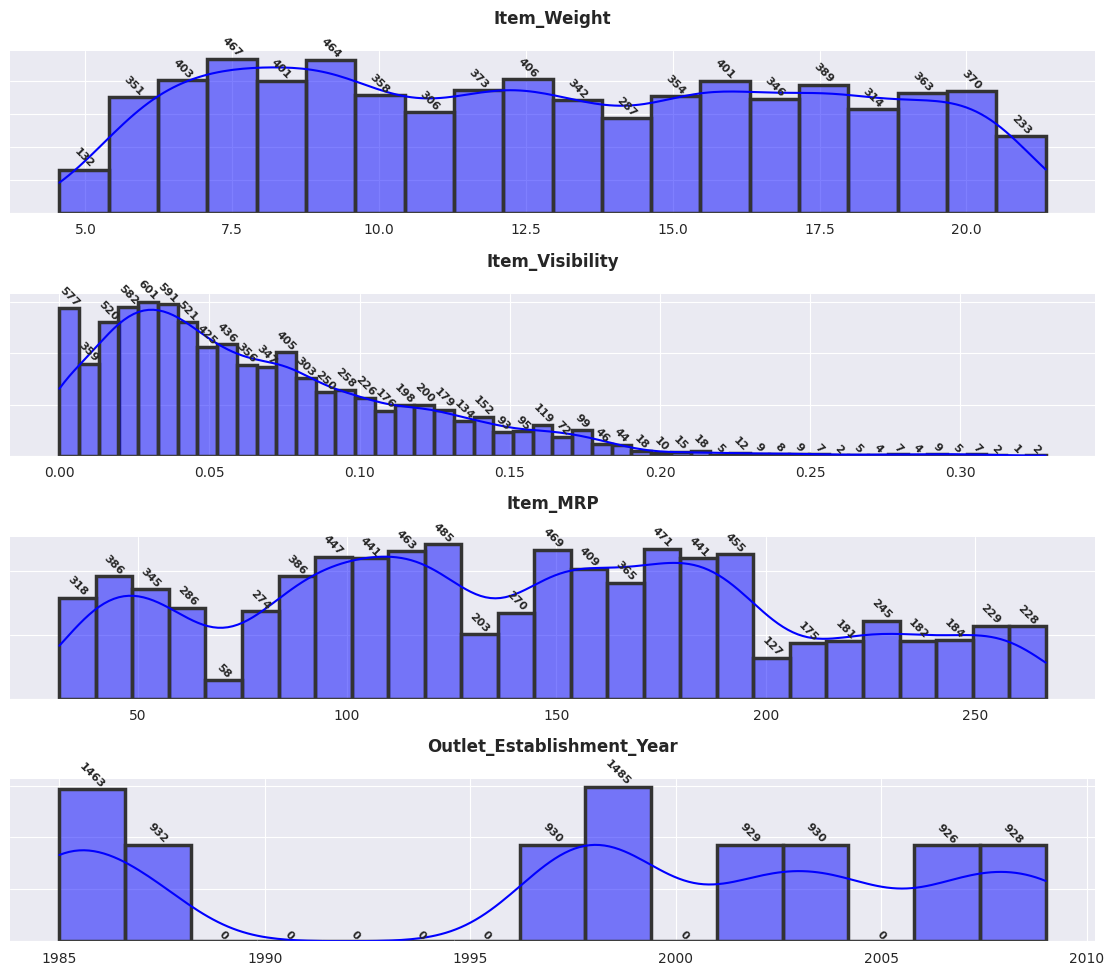

In [129]:
fig, axes = plt.subplots(4,1, figsize=(14,10))

fig.subplots_adjust(hspace=.5,top =1, wspace=.175)

for ax, col in zip(axes.flat,num_cols_train):
    sns.histplot(data=df_train, x=col,ax=ax,linewidth=2.5, edgecolor=".2",kde=True,color='blue')
    ax.spines[['top','left','right']].set_visible(False)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.tick_params(labelleft=False, left=False,labelsize=10)
    ax.set_title(col,fontweight="bold",pad=20)
    for i in ax.containers:
        ax.bar_label(i,fontsize=8,fontweight="bold",rotation=-45);

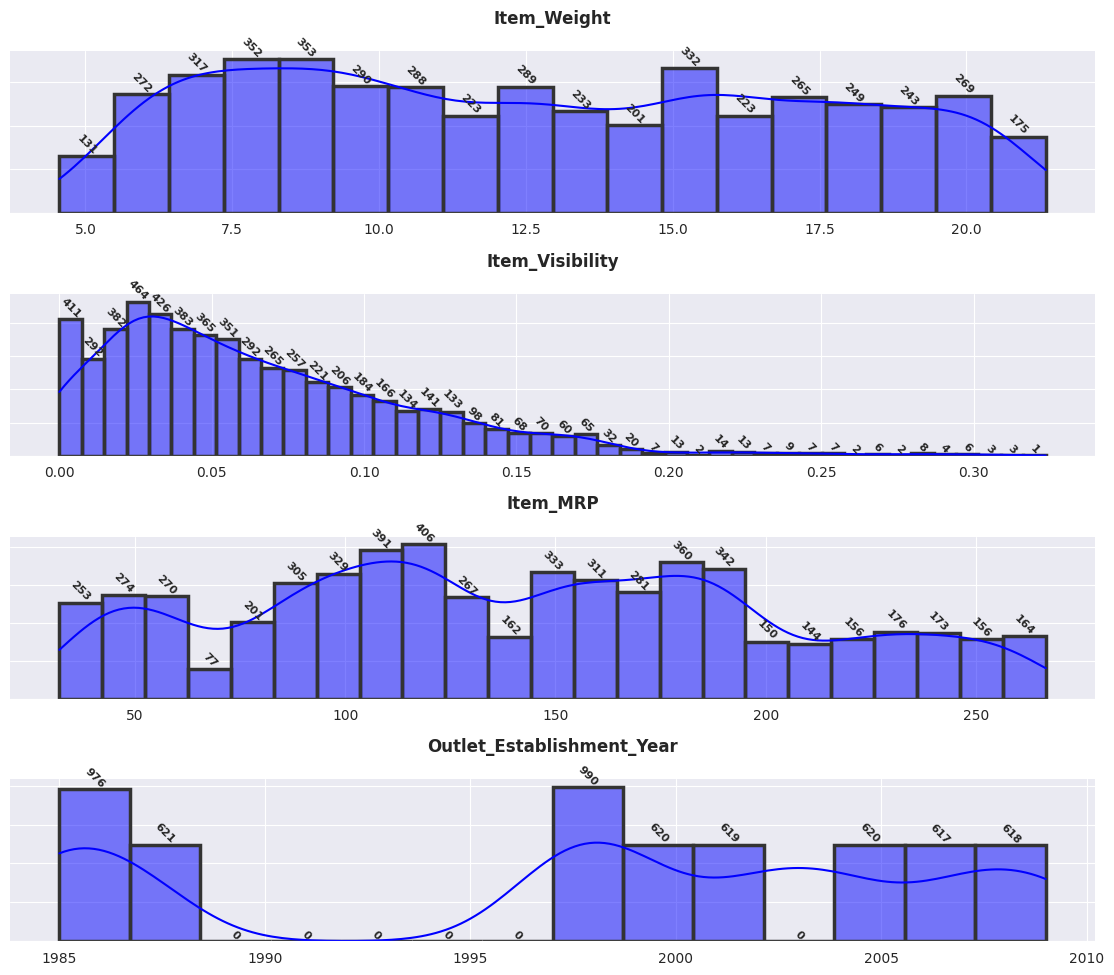

In [130]:
fig, axes = plt.subplots(4,1, figsize=(14,10))

fig.subplots_adjust(hspace=.5,top =1, wspace=.175)

for ax, col in zip(axes.flat,num_cols_test):
    sns.histplot(data=df_test, x=col,ax=ax,linewidth=2.5, edgecolor=".2",kde=True,color='blue')
    ax.spines[['top','left','right']].set_visible(False)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.tick_params(labelleft=False, left=False,labelsize=10)
    ax.set_title(col,fontweight="bold",pad=20)
    for i in ax.containers:
        ax.bar_label(i,fontsize=8,fontweight="bold",rotation=-45);

La distribución de las variables numéricas de ambos datasets son similares. Ninguna variable tiene distribución normal.

<h5>Relación de los features y el target</h5>

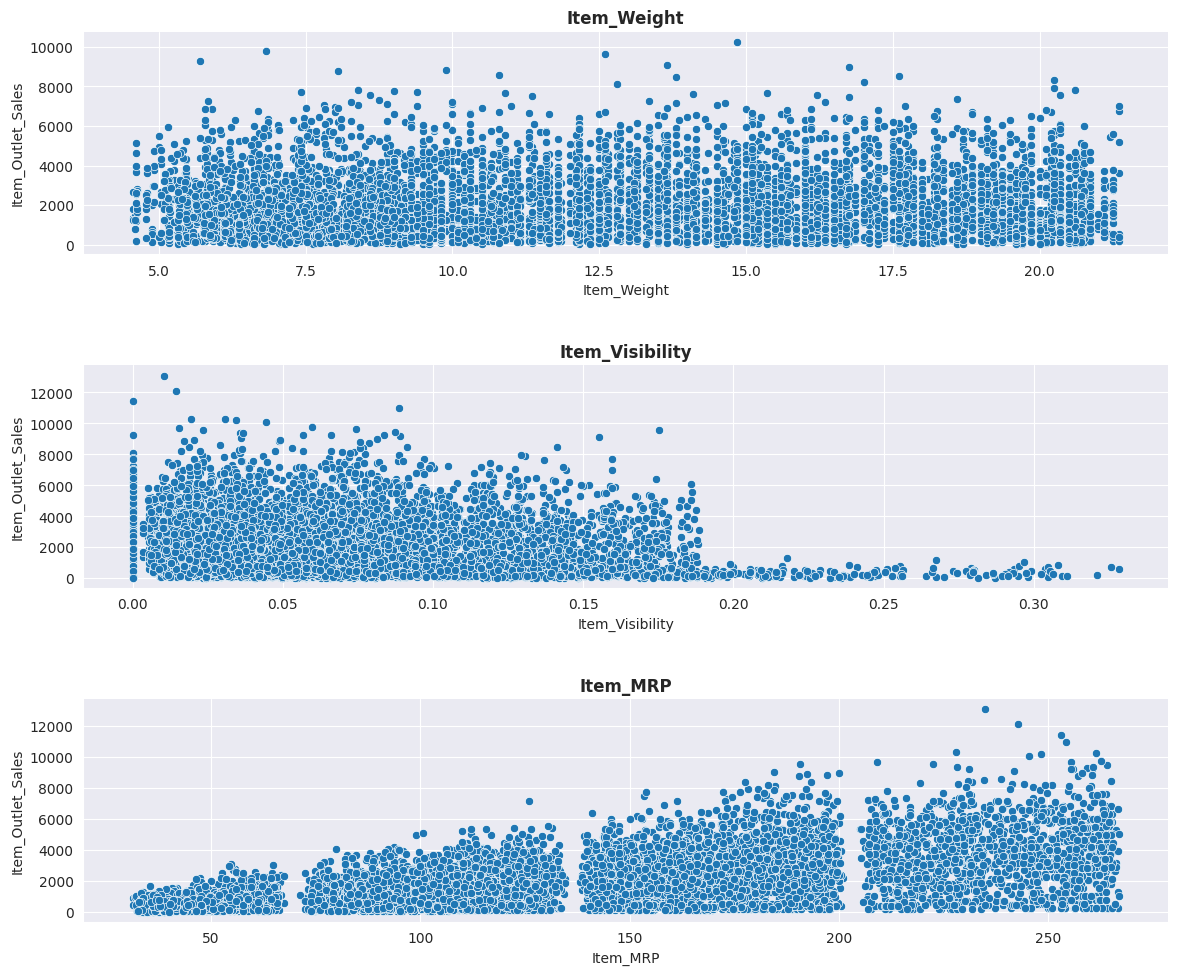

In [131]:
cols= ['Item_Weight', 'Item_Visibility', 'Item_MRP']

fig, axes = plt.subplots(3,1, figsize=(14,10))

fig.subplots_adjust(hspace=.5,top =1, wspace=.175)

for ax, col in zip(axes.flat,cols):
    ax.spines[['top','right']].set_visible(False)
    sns.scatterplot(data=df_train, x=col,y='Item_Outlet_Sales',ax=ax)
    ax.set_title(col,fontweight="bold")

* Lo primero a tener en cuenta es que Item_Weight tiene null values, por lo tanto, todavía no me atrevo a desecharla. 
* Y a simple vista Item_MRP es el feature que más se relaciona con el target. 
* También hay que tener en cuenta que la relación entre Item_Visibility y el target va decreciendo y luego tiene una caída abrupta. Quizás sería interesante poner una variable interviniente gráficamente para ver que sucede. 
* Pero también cabe aclarar que en esta variable figura que los productos más vendidos tienen 0 visibilidad. Esto es raro. 

In [132]:
df_train['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [133]:
df_test['Item_Visibility'].value_counts()

Item_Visibility
0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: count, Length: 5277, dtype: int64

Estamos en lo cierto, hay 526 y 353 veces aparece la ocurrencia 0. Que es la única que tiene gran cantidad de valores. Voy a imputarle el valor media sobre los 2 datasets. Son pocos valores en relación al total de registros para hacer una columna categórica con ['Unknown Visibility','Known Visibility']

In [134]:
visibility_mean_value = round(pd.concat([df_train['Item_Visibility'],df_test['Item_Visibility']],axis=0).mean(),6)

visibility_mean_value

0.065953

In [135]:
df_train['Item_Visibility']=df_train['Item_Visibility'].replace(0,0.065953)
df_test['Item_Visibility']=df_test['Item_Visibility'].replace(0,0.065953)

<h5>Outlet_Establishment_Year</h5>

En realidad este feature (o variable independiente) la consideramos como una variable categórica, ya que de esta manera nos va a poder dar más información. En un principio, pensé en pasar la variable numérica a datetime, luego pensé en hacer intérvalos con el cut method, pero la variable iba a quedar muy imbalanceada si tomaba por década. 

Pero considero que hacer OneHotEncoder nos va a dar mejores resultados, ya que no es una variable ordinal.

In [136]:
#la distribución cuenta con 9 categorias en la variable(feature with 9 values)

df_train['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [137]:
#La distribución, en proporción, es similar al Train set.
#Al observar esto vemos que ambos datasets son bastantes similares, lo mismo sucedió con los null values.
df_test['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    976
1987    621
1999    620
1997    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: count, dtype: int64

In [138]:
#Transformamos el feature(o variable independiente) a object type, el feature engineering va luego.
df_train['Outlet_Establishment_Year'] = df_train['Outlet_Establishment_Year'].astype(str)
df_test['Outlet_Establishment_Year'] = df_test['Outlet_Establishment_Year'].astype(str)

<h4>Categorical features</h4>

Son 8 columnas categóricas:

In [139]:
df_train.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

* Item_Identifier

In [140]:
df_train['Item_Identifier'].value_counts() #no es un valor único

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [141]:
df_test['Item_Identifier'].value_counts() #no es un valor unico.

Item_Identifier
DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: count, Length: 1543, dtype: int64

Item_Identifier no es un valor único y en este caso tiene distinta longitud la cantidad de distintas ocurrencias de los valores. Creamos dos columnas nuevas para ver si estas nos dicen más información con respecto a los items. 
Considero que puede ser distinta empresa las 3 primeras letras y los número un distinto producto. Pero en caso contrario, es una característica de un producto. Cabe aclarar, que sería mejor para tener un mejor análisis saber más acerca de este feature.

In [142]:
df_train['Letter_Item_Identifier'] =df_train['Item_Identifier'].str[0:3] #creo nuevas variables
df_test['Letter_Item_Identifier'] =df_test['Item_Identifier'].str[0:3]

In [143]:
df_train['Number_Item_Identifier'] =df_train['Item_Identifier'].str[3:] #creo nuevas variables

df_test['Number_Item_Identifier'] =df_test['Item_Identifier'].str[3:]

In [144]:
print(f'Cantidad valores únicos de Number_Item_Identifier \n en el Train set es de: {len(df_train["Number_Item_Identifier"].unique())} \n en el Test set es de: {len(df_test["Number_Item_Identifier"].unique())}')
print('#######'*10)
print(f'Cantidad valores únicos de Letter_Item_Identifier \n en el Train set es de: {len(df_train["Letter_Item_Identifier"].unique())} \n en el Test set es de: {len(df_test["Letter_Item_Identifier"].unique())}')

Cantidad valores únicos de Number_Item_Identifier 
 en el Train set es de: 60 
 en el Test set es de: 60
######################################################################
Cantidad valores únicos de Letter_Item_Identifier 
 en el Train set es de: 71 
 en el Test set es de: 71


Tiene mismo cantidad de values en ambos datasets. 

Ploteamos:

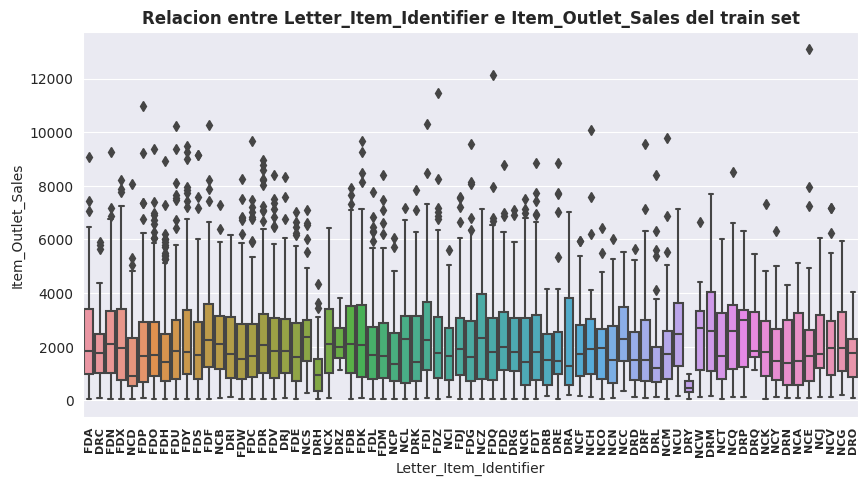

In [145]:
plt.figure(figsize=(10, 5))
plt.title('Relacion entre Letter_Item_Identifier e Item_Outlet_Sales del train set',size=12,fontweight='bold')

sns.boxplot(data=df_train,x='Letter_Item_Identifier',y='Item_Outlet_Sales')
sns.set_style('darkgrid')
plt.xticks(rotation=90,fontweight='bold',fontsize=8)
plt.show()

In [146]:
#Cambio el valor de la columna para tener ordenados los datos

df_train['Number_Item_Identifier'] = pd.to_numeric(df_train['Number_Item_Identifier'])
df_test['Number_Item_Identifier'] = pd.to_numeric(df_test['Number_Item_Identifier'])

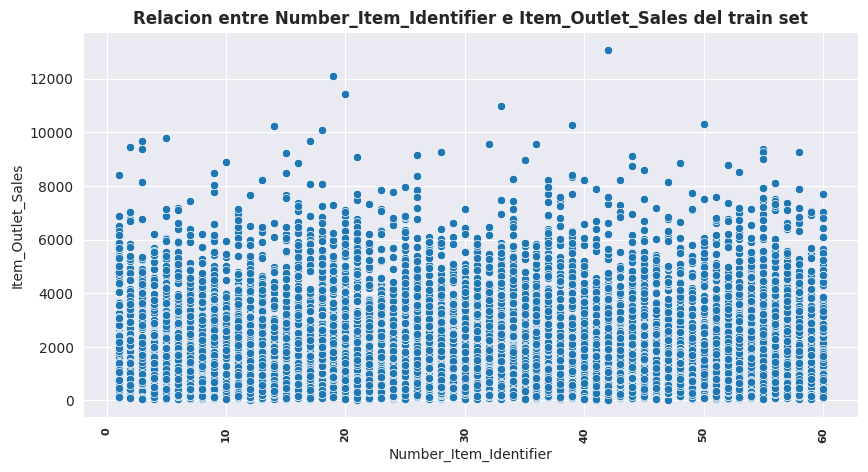

In [147]:
plt.figure(figsize=(10, 5))
plt.title('Relacion entre Number_Item_Identifier e Item_Outlet_Sales del train set',size=12,fontweight='bold')
sns.scatterplot(data=df_train,x='Number_Item_Identifier',y='Item_Outlet_Sales',)
sns.set_style('darkgrid')
plt.xticks(rotation=90,fontweight='bold',fontsize=8)
plt.show()

In [148]:
fig=px.scatter(df_train,x='Number_Item_Identifier',y='Item_Outlet_Sales',color='Letter_Item_Identifier',
               title="Relación entre Letter_Item_Identifier e Item_Outlet_Sales según Number_Item_Identifier")

fig.show()

Cruce ambas variables nuevas introducidas entre si con el Target para saber si había alguna relación. Use Plotly.Express, ya que tiene una interfaz interactiva, la cual me permite ver todas las categorias de la variable interviniente. Se observó que Number_Item_Identifier no hay ninguna relación lineal(es decir, el numero 2 no tiene más ventas que el 1 necesariamente)

* Item_Fat_Content

Rápidamente nos dimos cuenta que eran 2 categorías de la variable.

In [149]:
#LF es low fat, reg es Regular y low fat es Low Fat
df_train['Item_Fat_Content'].replace({'reg':'Regular','LF':'Low Fat','low fat':'Low Fat'},inplace=True)

df_test['Item_Fat_Content'].replace({'reg':'Regular','LF':'Low Fat','low fat':'Low Fat'},inplace=True)

df_train['Item_Fat_Content'].value_counts() #distribución de la variable

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Grafiqué para saber la relación que tiene con el Target.

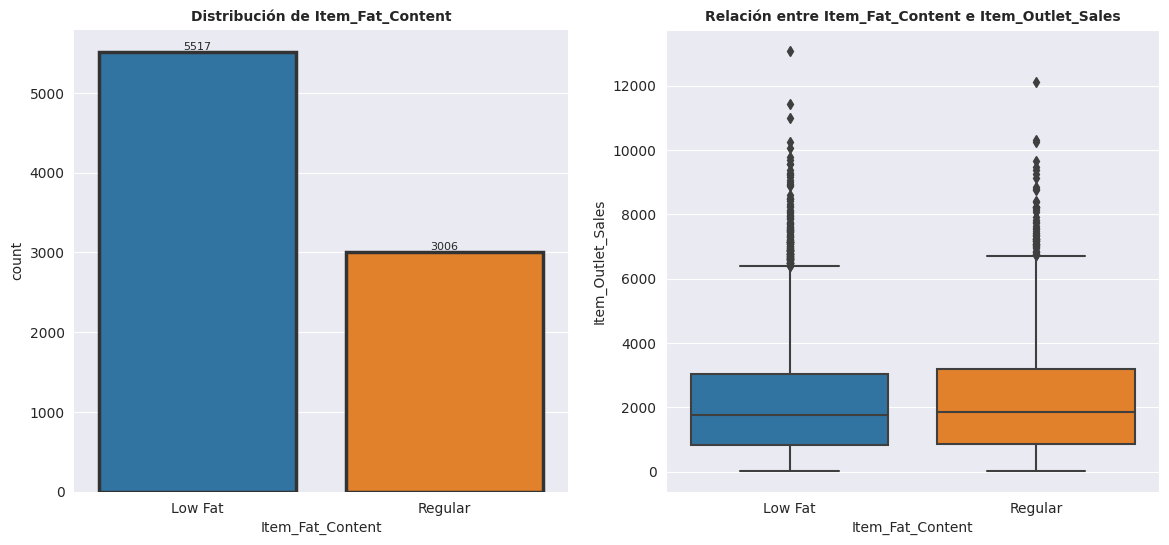

In [150]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(14,6))


sns.countplot(data=df_train,ax=ax[0],x='Item_Fat_Content',linewidth=2.5, edgecolor=".2")
ax[0].set_title('Distribución de Item_Fat_Content',size=10,weight='bold')
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)

for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=8);
#ax[0].set_ylabel(None)


sns.boxplot(data=df_train,ax=ax[1],x='Item_Fat_Content',y='Item_Outlet_Sales')
ax[1].set_title('Relación entre Item_Fat_Content e Item_Outlet_Sales',size=10,weight='bold')
sns.set_style('darkgrid')

plt.show()

Es una variable nominal dicotómica que presenta una diferencia considerable en su distribución, pero cuando se relacionan ambos valores del feature con el target, pareciera ser que no hay una diferencia considerable.

* Item_Type

En el ejercicio ofrecido hay ciertas asunciones:

La primera de ellas consiste en que el Item Type es fuertemente influyente con el tipo de ventas. 

¿Productos de ventas generales se venden más que Bebidas Alcohólicas?

In [151]:
df_train['Item_Type'].value_counts() #distribución de la variable

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

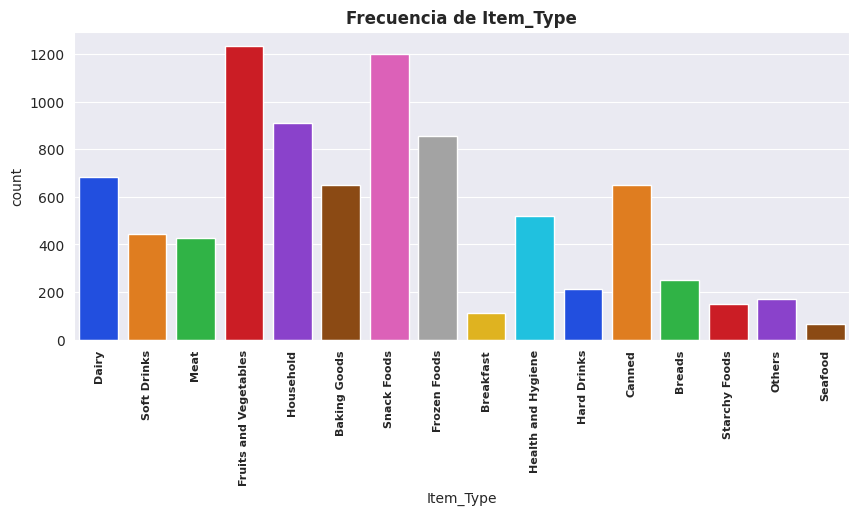

In [152]:
plt.figure(figsize=(10, 4))
plt.title('Frecuencia de Item_Type',size=12,fontweight='bold')
sns.countplot(data=df_train,x='Item_Type',palette='bright') #important feature?
plt.xticks(rotation=90,fontweight='bold',fontsize=8)
plt.show()

#Acá plotee también el test set, pero lo saqué para que no ocupe tanto espacio. La distribución es similar.

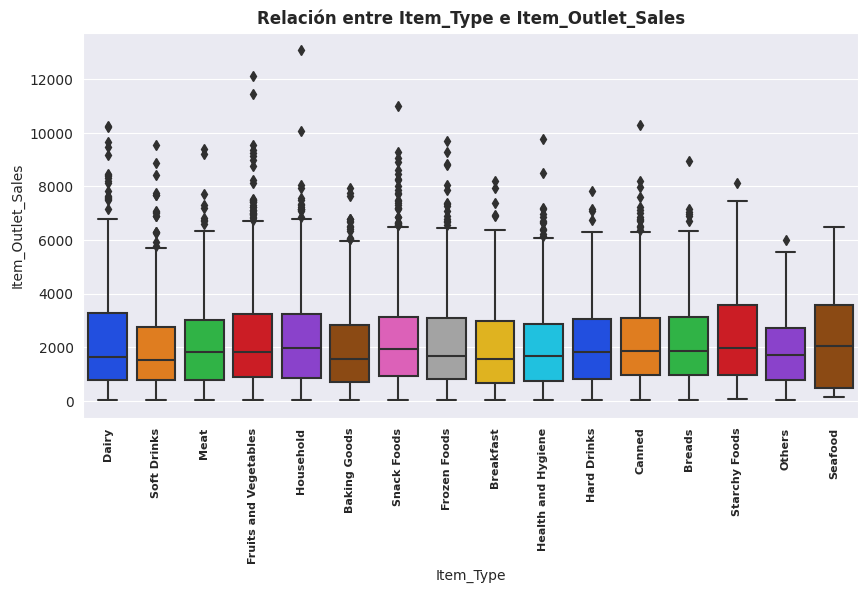

In [153]:
plt.figure(figsize=(10, 5))
plt.title('Relación entre Item_Type e Item_Outlet_Sales',size=12,fontweight='bold')
sns.boxplot(data=df_train,x='Item_Type',y='Item_Outlet_Sales',palette='bright')
plt.xticks(rotation=90,fontweight='bold',fontsize=8)
plt.show()

Hard Drinks no tiene los valores más altos de la distribución. Hay Outliers en todos valores de la variable, que no me atrevo a sacar debido a que el Test set está bastante parecido.

* Outlet_Identifier

In [154]:
df_train['Outlet_Identifier'].value_counts() #distribución de la variable

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

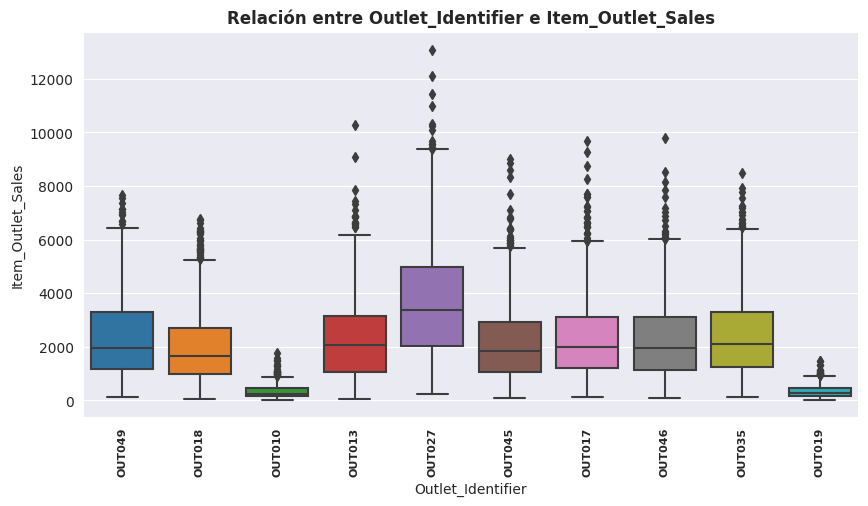

In [155]:
plt.figure(figsize=(10, 5))
plt.title('Relación entre Outlet_Identifier e Item_Outlet_Sales',size=12,fontweight='bold')
sns.boxplot(data=df_train,x='Outlet_Identifier',y='Item_Outlet_Sales')
plt.xticks(rotation=90,fontweight='bold',fontsize=8)
plt.show()

* Outlet Size

In [156]:
df_train['Outlet_Size'].value_counts() #2410 null values, más de 1/4 del total

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

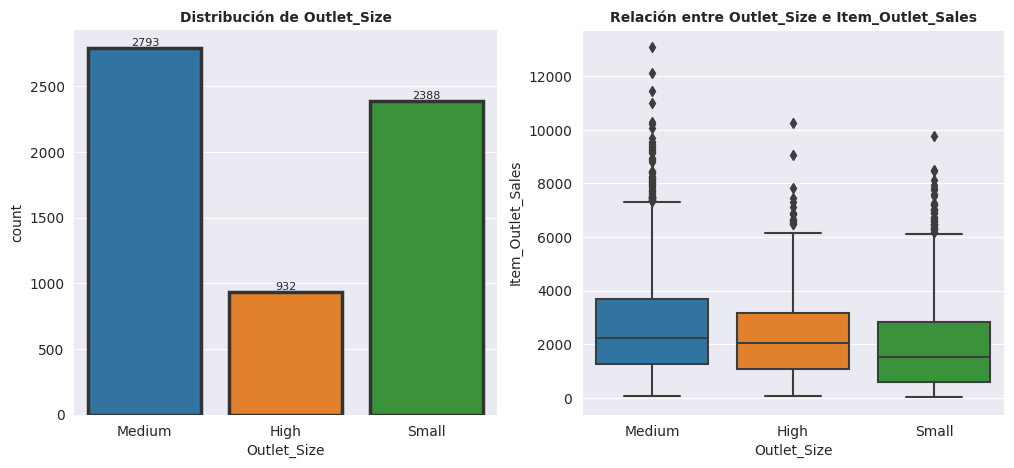

In [157]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12,5))


sns.countplot(data=df_train,ax=ax[0],x='Outlet_Size',linewidth=2.5, edgecolor=".2")
ax[0].set_title('Distribución de Outlet_Size',size=10,weight='bold')
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)

for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=8);
#ax[0].set_ylabel(None)


sns.boxplot(data=df_train,ax=ax[1],x='Outlet_Size',y='Item_Outlet_Sales')
ax[1].set_title('Relación entre Outlet_Size e Item_Outlet_Sales',size=10,weight='bold')
sns.set_style('darkgrid')

plt.show()

Recordamos que esta variable tiene null Values, al ser resueltas posteriormente. 

En este caso, Outlet_Size presenta variación en sus valores con respecto a Item_Outlet_Sales.

* Outlet_Location_Type

Sería mejor saber que implican los distintos valores de la variable para poder profundizar mejor el análisis.

In [158]:
df_train['Outlet_Location_Type'].value_counts() #ubicacion

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

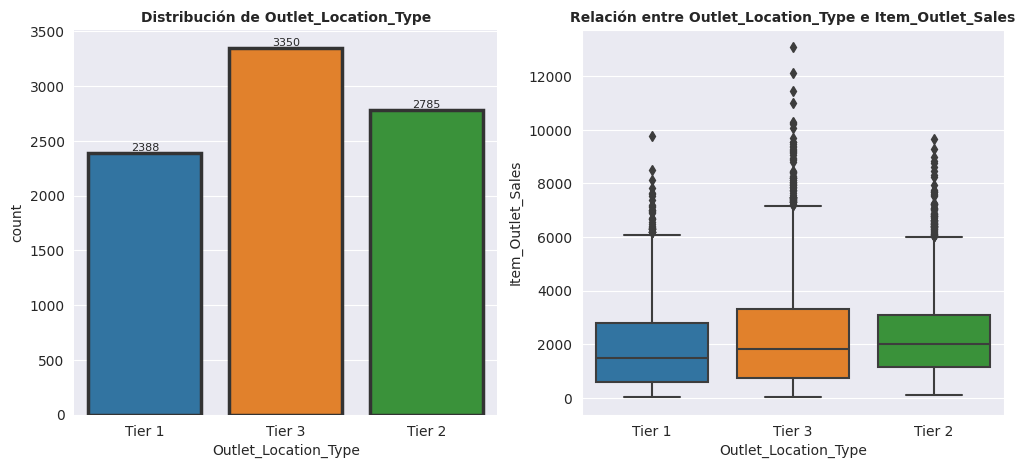

In [159]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12,5))


sns.countplot(data=df_train,ax=ax[0],x='Outlet_Location_Type',linewidth=2.5, edgecolor=".2")
ax[0].set_title('Distribución de Outlet_Location_Type',size=10,weight='bold')
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)

for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=8);



sns.boxplot(data=df_train,ax=ax[1],x='Outlet_Location_Type',y='Item_Outlet_Sales')
ax[1].set_title('Relación entre Outlet_Location_Type e Item_Outlet_Sales',size=10,weight='bold')
sns.set_style('darkgrid')

plt.show()



* Outlet_Type

Este es un feature que nos ayudara en el proceso para obtener los null values.

In [160]:
df_train['Outlet_Type'].value_counts() #Tipo de negocio 
                                        #Nos falta información con respecto a que es un Supermarket Type 1,2,3

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

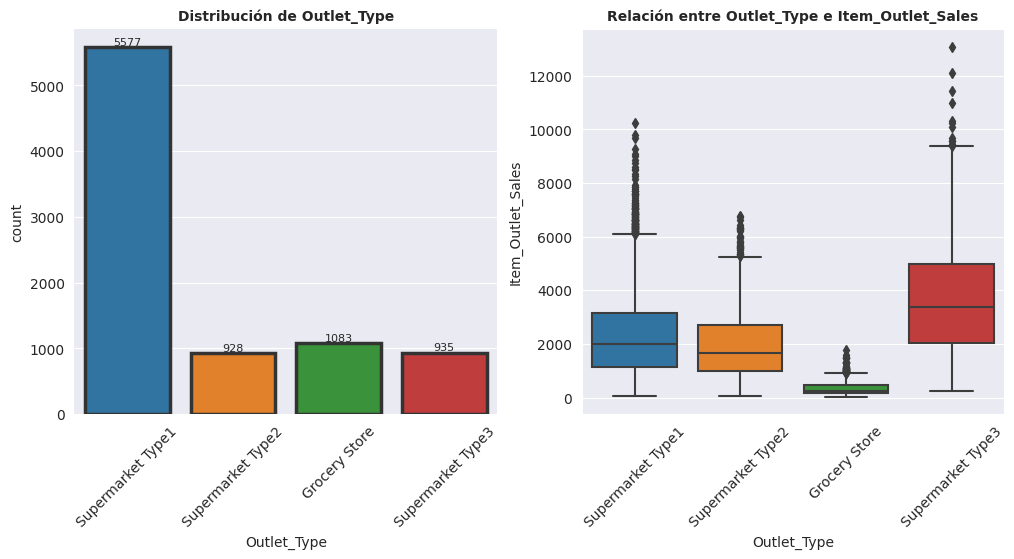

In [161]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12,5))


sns.countplot(data=df_train,ax=ax[0],x='Outlet_Type',linewidth=2.5, edgecolor=".2")
ax[0].set_title('Distribución de Outlet_Type',size=10,weight='bold')
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[0].tick_params(axis='x', rotation=45)

for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=8);



sns.boxplot(data=df_train,ax=ax[1],x='Outlet_Type',y='Item_Outlet_Sales')
ax[1].set_title('Relación entre Outlet_Type e Item_Outlet_Sales',size=10,weight='bold')
sns.set_style('darkgrid')
ax[1].tick_params(axis='x', rotation=45)

plt.show()


* Outlet_Establishment_Year

Podría transformar el feature para la fecha de hoy haciendo 2023 menos el año en el que se estableció el Outlet, pero sería lo mismo para el análisis.

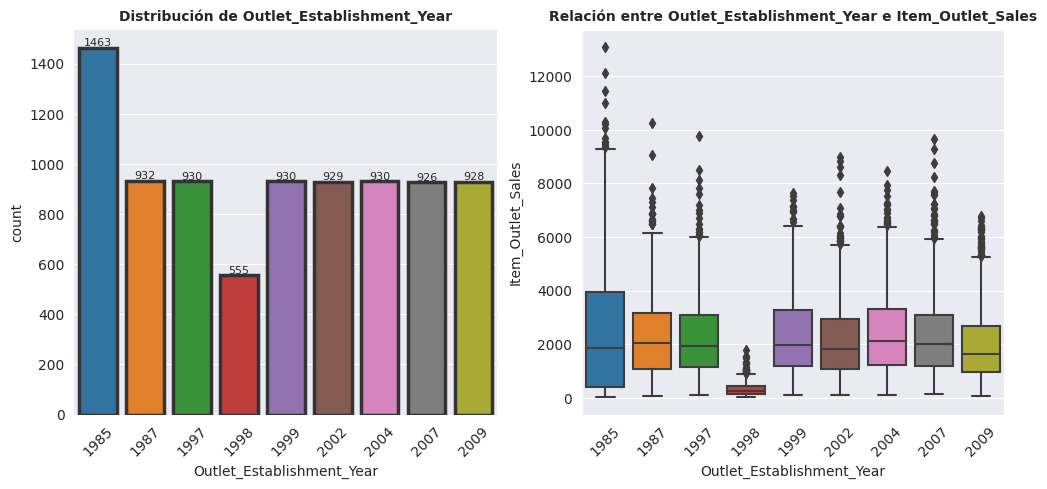

In [162]:
years_order= ['1985','1987','1997','1998','1999','2002','2004','2007','2009']

fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12,5))


sns.countplot(data=df_train,ax=ax[0],x='Outlet_Establishment_Year',linewidth=2.5, edgecolor=".2",order= years_order)
ax[0].set_title('Distribución de Outlet_Establishment_Year',size=10,weight='bold')
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[0].tick_params(axis='x', rotation=45)

for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=8);



sns.boxplot(data=df_train,ax=ax[1],x='Outlet_Establishment_Year',y='Item_Outlet_Sales',order=years_order)
ax[1].set_title('Relación entre Outlet_Establishment_Year e Item_Outlet_Sales',size=10,weight='bold')
sns.set_style('darkgrid')
ax[1].tick_params(axis='x', rotation=45)

plt.show()

<h3>Feature Engineering</h3>

<h5>Dealing with Null Values</h5>

Como se pudo ver al principio, hay 2 categorias que tienen null values:

* Una variable categórica: Outlet_Size.

* Una variable numérica continua: Item_Weight.



* Outlet_Size

Al analizar el Dataset, parto de una intuición que quizás nos pueda dar una pista. Outlet_Type tiene una categoría que se llama Grocery_Store (lo que sería un almacén en Castellano),entonces pienso que puede tener algún sentido ver si hay alguna coincidencia entre las categorias de las 2 variables. A su vez, entiendo que quizás sea más difícil de precisar que tipo de Outlet_Size tiene un Grocery Store en el momento de la carga del dato,lo cual sería un problema.

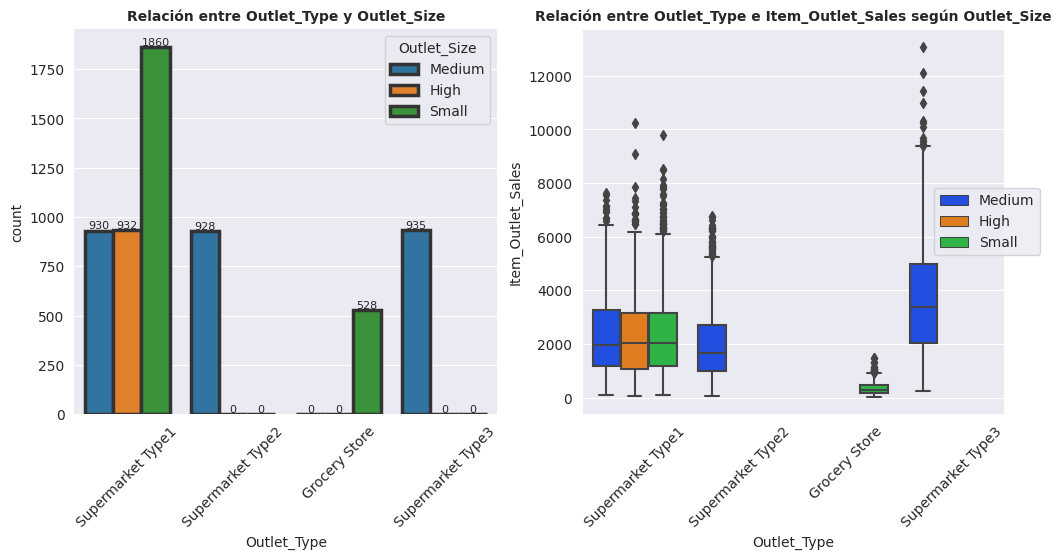

In [163]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.countplot(data=df_train,ax=ax[0],x='Outlet_Type',hue='Outlet_Size',linewidth=2.5, edgecolor=".2")
ax[0].set_title('Relación entre Outlet_Type y Outlet_Size',size=10,weight='bold')
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[0].tick_params(axis='x', rotation=45)

for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=8);

sns.boxplot(data=df_train,ax=ax[1],x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',palette='bright')
ax[1].set_title('Relación entre Outlet_Type e Item_Outlet_Sales según Outlet_Size',size=10,fontweight='bold')
sns.set_style('darkgrid')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.show()

Se confirma lo que decimos. El primer gráfico se puede observar que hay 528 Grocery Store==528 Small Stores. En el segundo gráfico lo vemos en relación al target. 
El pensamiento es el siguiente: tenemos Null Values en el feature Outlet_Size. Todos los Grocery Store son Small, vamos a ver si cuando buscamos grocery stores en el feature Outlet_Type, vemos si hay null values en la variable Outlet_Size. 

Acá descubrimos que también hay en Supermarket Type2 y Supermarket Type 3 un solo valor,podríamos hacer el mismo procedimiento. Estaría bueno tener más información sobre las características de los valores de la variable Outlet_Type.


In [164]:

# Hay 555 casos en los que cuando se cumple la condición Outlet_Type== Grocery Store, en Outlet_Size hay valores nulos.
df_train[(df_train['Outlet_Type']=='Grocery Store') & (df_train['Outlet_Size'].isna())]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility   
3              FDX07       19.200          Regular         0.065953  \
28             FDE51        5.925          Regular         0.161467   
30             FDV38       19.250          Low Fat         0.170349   
45             FDM39        6.420          Low Fat         0.089499   
65             FDC46       17.700          Low Fat         0.195068   
...              ...          ...              ...              ...   
8400           NCE07        8.180          Low Fat         0.021977   
8432           FDI16       14.000          Regular         0.227261   
8473           DRI47       14.700          Low Fat         0.035016   
8486           FDR20       20.000          Regular         0.065953   
8509           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier   
3     Fruits and Vegetables  182.0950            OUT010  \
28                    Dairy   45.5086            OUT010   
30                    Dairy   55.7956            OUT010   
45                    Dairy  178.1002            OUT010   
65              Snack Foods  185.4266            OUT010   
...                     ...       ...               ...   
8400              Household  140.6154            OUT010   
8432           Frozen Foods   54.3640            OUT010   
8473            Hard Drinks  144.3128            OUT010   
8486  Fruits and Vegetables   46.4744            OUT010   
8509  Fruits and Vegetables  213.9902            OUT010   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type   
3                         1998         NaN               Tier 3  \
28                        1998         NaN               Tier 3   
30                        1998         NaN               Tier 3   
45                        1998         NaN               Tier 3   
65                        1998         NaN               Tier 3   
...                        ...         ...                  ...   
8400                      1998         NaN               Tier 3   
8432                      1998         NaN               Tier 3   
8473                      1998         NaN               Tier 3   
8486                      1998         NaN               Tier 3   
8509                      1998         NaN               Tier 3   

        Outlet_Type  Item_Outlet_Sales Letter_Item_Identifier   
3     Grocery Store           732.3800                    FDX  \
28    Grocery Store           178.4344                    FDE   
30    Grocery Store           163.7868                    FDV   
45    Grocery Store           358.2004                    FDM   
65    Grocery Store           184.4266                    FDC   
...             ...                ...                    ...   
8400  Grocery Store           425.4462                    NCE   
8432  Grocery Store           159.7920                    FDI   
8473  Grocery Store           431.4384                    DRI   
8486  Grocery Store            45.2744                    FDR   
8509  Grocery Store           424.7804                    FDG   

      Number_Item_Identifier  
3                          7  
28                        51  
30                        38  
45                        39  
65                        46  
...                      ...  
8400                       7  
8432                      16  
8473                      47  
8486                      20  
8509                      45  

[555 rows x 14 columns]

In [165]:
#Ningun valor nulo para cuando Outlet_Type == Supermarket Type 2

df_train[(df_train['Outlet_Type']=='Supermarket Type2') & (df_train['Outlet_Size'].isna())]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales, Letter_Item_Identifier, Number_Item_Identifier]
Index: []

In [166]:
df_train[(df_train['Outlet_Type']=='Supermarket Type3') & (df_train['Outlet_Size'].isna())]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales, Letter_Item_Identifier, Number_Item_Identifier]
Index: []

Esto nos resuelve parte de la cuestión para transformar parte de los null values del feature. Chequeamos que esto suceda también en el test_Set.

In [167]:
#370 valores nulos en el test set que cumplan la condición dicha.
df_test[(df_test['Outlet_Type']=='Grocery Store') & (df_test['Outlet_Size'].isna())]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility   
2              NCN55       14.600          Low Fat         0.099575  \
19             FDA46       13.600          Low Fat         0.196898   
25             FDX22        6.785          Regular         0.038455   
37             FDD48       10.395          Low Fat         0.050479   
41             FDY19       19.750          Low Fat         0.069236   
...              ...          ...              ...              ...   
5571           FDI15       13.800          Low Fat         0.236595   
5572           NCH43        8.420          Low Fat         0.118118   
5580           FDA23        9.800          Low Fat         0.078981   
5650           FDC10        9.800          Regular         0.121982   
5668           FDC44       15.600          Low Fat         0.288892   

                  Item_Type  Item_MRP Outlet_Identifier   
2                    Others  241.7538            OUT010  \
19              Snack Foods  193.7136            OUT010   
25              Snack Foods  209.4928            OUT010   
37             Baking Goods  114.0176            OUT010   
41    Fruits and Vegetables  116.6466            OUT010   
...                     ...       ...               ...   
5571                  Dairy  265.0884            OUT010   
5572              Household  216.9192            OUT010   
5580           Baking Goods  100.1016            OUT010   
5650            Snack Foods  119.7098            OUT010   
5668  Fruits and Vegetables  115.1518            OUT010   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type   
2                         1998         NaN               Tier 3  \
19                        1998         NaN               Tier 3   
25                        1998         NaN               Tier 3   
37                        1998         NaN               Tier 3   
41                        1998         NaN               Tier 3   
...                        ...         ...                  ...   
5571                      1998         NaN               Tier 3   
5572                      1998         NaN               Tier 3   
5580                      1998         NaN               Tier 3   
5650                      1998         NaN               Tier 3   
5668                      1998         NaN               Tier 3   

        Outlet_Type Letter_Item_Identifier  Number_Item_Identifier  
2     Grocery Store                    NCN                      55  
19    Grocery Store                    FDA                      46  
25    Grocery Store                    FDX                      22  
37    Grocery Store                    FDD                      48  
41    Grocery Store                    FDY                      19  
...             ...                    ...                     ...  
5571  Grocery Store                    FDI                      15  
5572  Grocery Store                    NCH                      43  
5580  Grocery Store                    FDA                      23  
5650  Grocery Store                    FDC                      10  
5668  Grocery Store                    FDC                      44  

[370 rows x 13 columns]

In [168]:
df_test[(df_test['Outlet_Type']=='Supermarket Type2') & (df_test['Outlet_Size'].isna())]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Letter_Item_Identifier, Number_Item_Identifier]
Index: []

In [169]:
df_test[(df_test['Outlet_Type']=='Supermarket Type3') & (df_test['Outlet_Size'].isna())]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Letter_Item_Identifier, Number_Item_Identifier]
Index: []

Ambos datasets son similares, se cumple la condición igual que en el df_train. Por eso mismo procedemos a completar parte del dato faltante donde se cumplen las dos condiciones Outlet_Type=='Grocery Store' y Outlet_size es nulo, y a estos valores nulos los pasamos como Small. Sabemos que esto es un riesgo porque puede darse la colinealidad entre variables, pero consideramos que el pensamiento es el correcto.

In [170]:
#Chequea la condición Outlet_Type =='Grocery_Store' y Outlet_Size tenga null values, para retornar la columna Outlet_Size y a eso le pongo Small
#Transformamos esos 555 null values del primer dataset y 370 del test set.
df_train.loc[(df_train['Outlet_Type'] == 'Grocery Store') & (df_train['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'

df_test.loc[(df_test['Outlet_Type'] == 'Grocery Store') & (df_test['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'


Esto no soluciona completamente la situación de los null values en el feature, por eso buscamos lo mismo con el resto de los features. Hasta que llegamos a que Outlet_Location_Type sucede lo mismo.

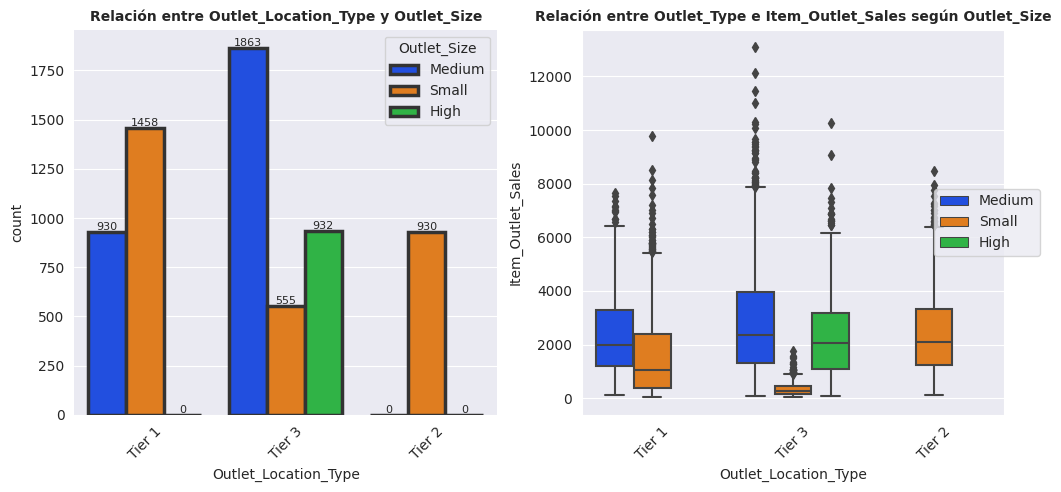

In [171]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.countplot(data=df_train,ax=ax[0],x='Outlet_Location_Type',hue='Outlet_Size',linewidth=2.5, edgecolor=".2",palette='bright')
ax[0].set_title('Relación entre Outlet_Location_Type y Outlet_Size',size=10,weight='bold')
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[0].tick_params(axis='x', rotation=45)

for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=8);

sns.boxplot(data=df_train,ax=ax[1],x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Size',palette='bright')
ax[1].set_title('Relación entre Outlet_Type e Item_Outlet_Sales según Outlet_Size',size=10,fontweight='bold')
sns.set_style('darkgrid')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.show()



Mismo proceso. Tier 2 son todos Small Shops. Entonces buscamos la condicion del Dataframe que Outlet_location_type sea igual a Tier 2 y Outlet Size tenga null values y los convertimos a Small.

También, cabe aclarar, que estaría bueno saber que significa Tier 1, Tier 2 y Tier 3.

In [172]:
#hay 1855 valores nulos
df_train[(df_train['Outlet_Location_Type']=='Tier 2') & (df_train['Outlet_Size'].isna())] 
#isna, isnull es lo mismo

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility   
8              FDH17        16.20          Regular         0.016687  \
9              FDU28        19.20          Regular         0.094450   
25             NCD06        13.00          Low Fat         0.099887   
33             FDO23        17.85          Low Fat         0.065953   
46             NCP05        19.60          Low Fat         0.065953   
...              ...          ...              ...              ...   
8501           FDW21         5.34          Regular         0.005998   
8502           NCH43         8.42          Low Fat         0.070712   
8508           FDW31        11.35          Regular         0.043246   
8514           FDA01        15.00          Regular         0.054489   
8519           FDS36         8.38          Regular         0.046982   

                  Item_Type  Item_MRP Outlet_Identifier   
8              Frozen Foods   96.9726            OUT045  \
9              Frozen Foods  187.8214            OUT017   
25                Household   45.9060            OUT017   
33                   Breads   93.1436            OUT045   
46       Health and Hygiene  153.3024            OUT045   
...                     ...       ...               ...   
8501            Snack Foods  100.4358            OUT017   
8502              Household  216.4192            OUT045   
8508  Fruits and Vegetables  199.4742            OUT045   
8514                 Canned   57.5904            OUT045   
8519           Baking Goods  108.1570            OUT045   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type   
8                         2002         NaN               Tier 2  \
9                         2007         NaN               Tier 2   
25                        2007         NaN               Tier 2   
33                        2002         NaN               Tier 2   
46                        2002         NaN               Tier 2   
...                        ...         ...                  ...   
8501                      2007         NaN               Tier 2   
8502                      2002         NaN               Tier 2   
8508                      2002         NaN               Tier 2   
8514                      2002         NaN               Tier 2   
8519                      2002         NaN               Tier 2   

            Outlet_Type  Item_Outlet_Sales Letter_Item_Identifier   
8     Supermarket Type1          1076.5986                    FDH  \
9     Supermarket Type1          4710.5350                    FDU   
25    Supermarket Type1           838.9080                    NCD   
33    Supermarket Type1          2174.5028                    FDO   
46    Supermarket Type1          2428.8384                    NCP   
...                 ...                ...                    ...   
8501  Supermarket Type1          1508.0370                    FDW   
8502  Supermarket Type1          3020.0688                    NCH   
8508  Supermarket Type1          2587.9646                    FDW   
8514  Supermarket Type1           468.7232                    FDA   
8519  Supermarket Type1           549.2850                    FDS   

      Number_Item_Identifier  
8                         17  
9                         28  
25                         6  
33                        23  
46                         5  
...                      ...  
8501                      21  
8502                      43  
8508                      31  
8514                       1  
8519                      36  

[1855 rows x 14 columns]

In [173]:
#hay 1236 valores nulos
df_test[(df_test['Outlet_Location_Type']=='Tier 2') & (df_test['Outlet_Size'].isna())] 

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility   
1              FDW14        8.300          Regular         0.038428  \
3              FDQ58        7.315          Low Fat         0.015388   
8              FDN33        6.305          Regular         0.123365   
9              FDA36        5.985          Low Fat         0.005698   
10             FDT44       16.600          Low Fat         0.103569   
...              ...          ...              ...              ...   
5662           FDK22        9.800          Low Fat         0.026234   
5670           FDO03       10.395          Regular         0.037092   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.065953   
5680           FDU37        9.500          Regular         0.104720   

                  Item_Type  Item_MRP Outlet_Identifier   
1                     Dairy   87.3198            OUT017  \
3               Snack Foods  155.0340            OUT017   
8               Snack Foods   95.7436            OUT045   
9              Baking Goods  186.8924            OUT017   
10    Fruits and Vegetables  118.3466            OUT017   
...                     ...       ...               ...   
5662            Snack Foods  214.3850            OUT017   
5670                   Meat  229.4352            OUT017   
5678     Health and Hygiene  118.7440            OUT045   
5679                 Canned  214.6218            OUT017   
5680                 Canned   79.7960            OUT045   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type   
1                         2007         NaN               Tier 2  \
3                         2007         NaN               Tier 2   
8                         2002         NaN               Tier 2   
9                         2007         NaN               Tier 2   
10                        2007         NaN               Tier 2   
...                        ...         ...                  ...   
5662                      2007         NaN               Tier 2   
5670                      2007         NaN               Tier 2   
5678                      2002         NaN               Tier 2   
5679                      2007         NaN               Tier 2   
5680                      2002         NaN               Tier 2   

            Outlet_Type Letter_Item_Identifier  Number_Item_Identifier  
1     Supermarket Type1                    FDW                      14  
3     Supermarket Type1                    FDQ                      58  
8     Supermarket Type1                    FDN                      33  
9     Supermarket Type1                    FDA                      36  
10    Supermarket Type1                    FDT                      44  
...                 ...                    ...                     ...  
5662  Supermarket Type1                    FDK                      22  
5670  Supermarket Type1                    FDO                       3  
5678  Supermarket Type1                    NCO                      17  
5679  Supermarket Type1                    FDJ                      26  
5680  Supermarket Type1                    FDU                      37  

[1236 rows x 13 columns]

Hacemos lo mismo. Convertimos los nulos a Small.

In [174]:
#Chequea la condición Outlet_Location_Type =='Tier 2' y Outlet_Size tenga null values, para retornar la columna Outlet_Size y a eso le pongo Small
#Transformamos esos 1855 null values del primer dataset y 1236 del test set.

df_train.loc[(df_train['Outlet_Location_Type'] == 'Tier 2') & (df_train['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'

df_test.loc[(df_test['Outlet_Location_Type'] == 'Tier 2') & (df_test['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'


In [175]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

In [176]:
#No hay más null values.
df_train['Outlet_Size'].isnull().sum()

0

In [177]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Letter_Item_Identifier          0
Number_Item_Identifier          0
dtype: int64

In [178]:
df_test.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Letter_Item_Identifier         0
Number_Item_Identifier         0
dtype: int64

De esa manera queda resuelto el problema de los null values de Outlet_Size. Me pareció esto más apropiado que imputarle un valor o poner en promedio los mismos valores. También me pareció que en proporción eran pocos los null values para borrar la variable.

<h5>Item_Weight</h5>

Problema: No sé si está en kilogramos, gramos,etc. ¿Qué unidad maneja? ¿Hay algún motivo por el cual son null values? Es decir, ¿son productos que utilicen ese tipo de medida? Por ejemplo, hay un valor de Item_Type que se llama Health and Hygiene. ¿Un cepillo de dientes se compra por peso o por unidad? ¿Soft_drinks y Hard Drinks está en kilos o litros? ¿Están en medidas equivalentes?
¿Se venden productos más pesados en tiendas más grandes? ¿Es decir, que quizás tenga que movilizarse para ser comprado?
O simplemente hay error de carga.
¿Hago una columna nueva que se llame Item con peso e Item sin peso?

In [179]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [180]:
df_test['Item_Weight'].describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [181]:
#Item_Fat_Content e Item_Visibility tal vez nos dice algo, pero vamos a chequear todos las variables.

top_20_rows = df_train.nlargest(20, 'Item_Weight') 
top_20_rows

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility   
43             FDC02        21.35          Low Fat         0.069103  \
483            FDC02        21.35          Low Fat         0.115195   
2368           FDC02        21.35          Low Fat         0.068809   
2802           FDC02        21.35          Low Fat         0.068765   
4257           FDR07        21.35          Low Fat         0.130127   
4468           FDC02        21.35          Low Fat         0.068822   
6389           FDR07        21.35          Low Fat         0.078061   
148            FDA45        21.25          Low Fat         0.155350   
934            FDQ21        21.25          Low Fat         0.019502   
2232           FDT03        21.25          Low Fat         0.009997   
3478           FDQ21        21.25          Low Fat         0.019423   
3632           FDT03        21.25          Low Fat         0.010039   
4054           FDT03        21.25          Low Fat         0.016736   
4764           FDT03        21.25          Low Fat         0.010055   
5111           NCO42        21.25          Low Fat         0.024651   
5393           FDT03        21.25          Low Fat         0.010019   
5457           NCO42        21.25          Low Fat         0.024706   
5717           NCX17        21.25          Low Fat         0.114246   
5782           FDA45        21.25          Low Fat         0.155250   
5959           FDQ21        21.25          Low Fat         0.019407   

                  Item_Type  Item_MRP Outlet_Identifier   
43                   Canned  259.9278            OUT018  \
483                  Canned  258.3278            OUT010   
2368                 Canned  258.5278            OUT035   
2802                 Canned  260.4278            OUT013   
4257  Fruits and Vegetables   96.2094            OUT010   
4468                 Canned  258.3278            OUT046   
6389  Fruits and Vegetables   96.0094            OUT018   
148             Snack Foods  178.2370            OUT035   
934             Snack Foods  120.8756            OUT018   
2232                   Meat  185.5608            OUT035   
3478            Snack Foods  120.8756            OUT046   
3632                   Meat  181.7608            OUT018   
4054                   Meat  185.2608            OUT010   
4764                   Meat  183.1608            OUT017   
5111              Household  146.0102            OUT035   
5393                   Meat  184.6608            OUT045   
5457              Household  145.1102            OUT045   
5717     Health and Hygiene  231.2300            OUT017   
5782            Snack Foods  175.7370            OUT013   
5959            Snack Foods  119.3756            OUT013   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type   
43                        2009      Medium               Tier 3  \
483                       1998       Small               Tier 3   
2368                      2004       Small               Tier 2   
2802                      1987        High               Tier 3   
4257                      1998       Small               Tier 3   
4468                      1997       Small               Tier 1   
6389                      2009      Medium               Tier 3   
148                       2004       Small               Tier 2   
934                       2009      Medium               Tier 3   
2232                      2004       Small               Tier 2   
3478                      1997       Small               Tier 1   
3632                      2009      Medium               Tier 3   
4054                      1998       Small               Tier 3   
4764                      2007       Small               Tier 2   
5111                      2004       Small               Tier 2   
5393                      2002       Small               Tier 2   
5457                      2002       Small               Tier 2   
5717                      2007       Small               Tier 2   


In [182]:
less_20_rows = df_train.nsmallest(20, 'Item_Weight')

less_20_rows

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility   
3489           FDP40        4.555          Regular         0.034351  \
4400           FDP40        4.555          Regular         0.034411   
4430           FDP40        4.555          Regular         0.034357   
7808           FDP40        4.555          Regular         0.034329   
1082           DRE12        4.590          Low Fat         0.070891   
1515           DRE12        4.590          Low Fat         0.070781   
3077           DRE12        4.590          Low Fat         0.070767   
6432           DRE12        4.590          Low Fat         0.070722   
7984           DRE12        4.590          Low Fat         0.065953   
966            DRF23        4.610          Low Fat         0.205295   
1412           DRF23        4.610          Low Fat         0.123346   
2254           DRF23        4.610          Low Fat         0.122843   
3051           DRF23        4.610          Low Fat         0.122901   
5493           DRF23        4.610          Low Fat         0.065953   
6335           DRF23        4.610          Low Fat         0.122629   
7559           DRF23        4.610          Low Fat         0.123152   
2198           FDX49        4.615          Regular         0.101813   
2373           FDX49        4.615          Regular         0.102408   
4021           FDX49        4.615          Regular         0.102038   
4606           FDX49        4.615          Regular         0.101747   

         Item_Type  Item_MRP Outlet_Identifier Outlet_Establishment_Year   
3489  Frozen Foods  112.7544            OUT035                      2004  \
4400  Frozen Foods  111.3544            OUT049                      1999   
4430  Frozen Foods  112.6544            OUT046                      1997   
7808  Frozen Foods  110.1544            OUT013                      1987   
1082   Soft Drinks  111.6860            OUT049                      1999   
1515   Soft Drinks  114.5860            OUT046                      1997   
3077   Soft Drinks  111.9860            OUT035                      2004   
6432   Soft Drinks  113.2860            OUT013                      1987   
7984   Soft Drinks  111.1860            OUT045                      2002   
966    Hard Drinks  172.8396            OUT010                      1998   
1412   Hard Drinks  172.5396            OUT017                      2007   
2254   Hard Drinks  172.4396            OUT049                      1999   
3051   Hard Drinks  174.4396            OUT045                      2002   
5493   Hard Drinks  173.8396            OUT046                      1997   
6335   Hard Drinks  175.4396            OUT035                      2004   
7559   Hard Drinks  175.2396            OUT018                      2009   
2198        Canned  232.2300            OUT035                      2004   
2373        Canned  234.3300            OUT017                      2007   
4021        Canned  231.9300            OUT045                      2002   
4606        Canned  231.3300            OUT013                      1987   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales   
3489       Small               Tier 2  Supermarket Type1          1789.6704  \
4400      Medium               Tier 1  Supermarket Type1          1342.2528   
4430       Small               Tier 1  Supermarket Type1          2684.5056   
7808        High               Tier 3  Supermarket Type1          1230.3984   
1082      Medium               Tier 1  Supermarket Type1          1584.6040   
1515       Small               Tier 1  Supermarket Type1          1245.0460   
3077       Small               Tier 2  Supermarket Type1           792.3020   
6432        High               Tier 3  Supermarket Type1          1471.4180   
7984       Small               Tier 2  Supermarket Type1          1245.0460   
966        Small               Tier 3      Grocery Store           174.4396   
1412       Small               Tier 2  Supermar

Usamos Plotly porque consideramos mejor la interfaz gráfica para poder ver los gráficos.

In [183]:
#la variable interviniente no interfiere, es igual
px.scatter(df_train,x='Item_Weight',y='Item_Outlet_Sales',color='Item_Fat_Content')

In [184]:
#Si bien es cierto que la variable modifica, es casi imperceptible.
px.scatter(df_train,x='Item_Weight',y='Item_Outlet_Sales',color='Item_Type')

In [185]:
#Al parecer tiene alguna correlación con Item_MRP
px.scatter(df_train,x='Item_Weight',y='Item_Outlet_Sales',color='Item_MRP')

In [186]:
px.scatter(df_train,x='Item_Weight',y='Item_Outlet_Sales',color='Letter_Item_Identifier')

In [187]:
#Quizás lo mejor sería completar con la mediana de todos los elementos
px.box(df_train,x='Item_Type',y='Item_Weight')

Podría utilizar la variable Item_MRP pero voy a imputar la mediana de cada valor que toma Item_Type.

In [188]:
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [189]:
for i in df_train['Item_Type'].unique():

# Calcula la mediana de 'Item_Weight' para el tipo de ítem 'Dairy'
    median = df_train[df_train['Item_Type'] == i]['Item_Weight'].median()

# Completa los valores nulos en 'Item_Weight' para 'Dairy' con la mediana
    df_train.loc[(df_train['Item_Type'] == i) & (df_train['Item_Weight'].isna()), 'Item_Weight'] = median

In [190]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Letter_Item_Identifier       0
Number_Item_Identifier       0
dtype: int64

De esta manera, queda terminado la asignación de valores a los null values.

DATA PREP

Tengo que escalar los features numéricos para que estén a escala. Vimos previamente que la nueva columna creada Number_Item_Identifier no nos aporta ningún dato. 

In [191]:
print(f'Las columnas del df_train son: \n {df_train.select_dtypes(include=np.number).columns}')
print(f'Cantidad de variables numéricas: {len(df_train.select_dtypes(include=np.number).columns)}')
print('################'*5)
print(f'Las columnas del df_test son: \n {df_test.select_dtypes(include=np.number).columns}')
print(f'Cantidad de variables numéricas: {len(df_test.select_dtypes(include=np.number).columns)}')

Las columnas del df_train son: 
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Number_Item_Identifier'],
      dtype='object')
Cantidad de variables numéricas: 5
################################################################################
Las columnas del df_test son: 
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Number_Item_Identifier'], dtype='object')
Cantidad de variables numéricas: 4


In [192]:
#Drop la columna Number_Item_Identifier de ambos Datasets

df_train.drop(columns='Number_Item_Identifier',axis=1,inplace=True)
df_test.drop(columns='Number_Item_Identifier',axis=1,inplace=True)

In [193]:

 #Probe con standard scaler y con MinMax
col=['Item_Weight', 'Item_Visibility', 'Item_MRP']
scaler = MinMaxScaler()
df_train[col]=scaler.fit_transform(df_train[col])

df_test[col]=scaler.fit_transform(df_test[col])


In [194]:
df_train[col].describe()

Item_Weight  Item_Visibility     Item_MRP
count  8523.000000      8523.000000  8523.000000
mean      0.491717         0.205124     0.465635
std       0.252538         0.150062     0.264327
min       0.000000         0.000000     0.000000
25%       0.283120         0.090853     0.265437
50%       0.493897         0.181462     0.474209
75%       0.681453         0.280191     0.655156
max       1.000000         1.000000     1.000000

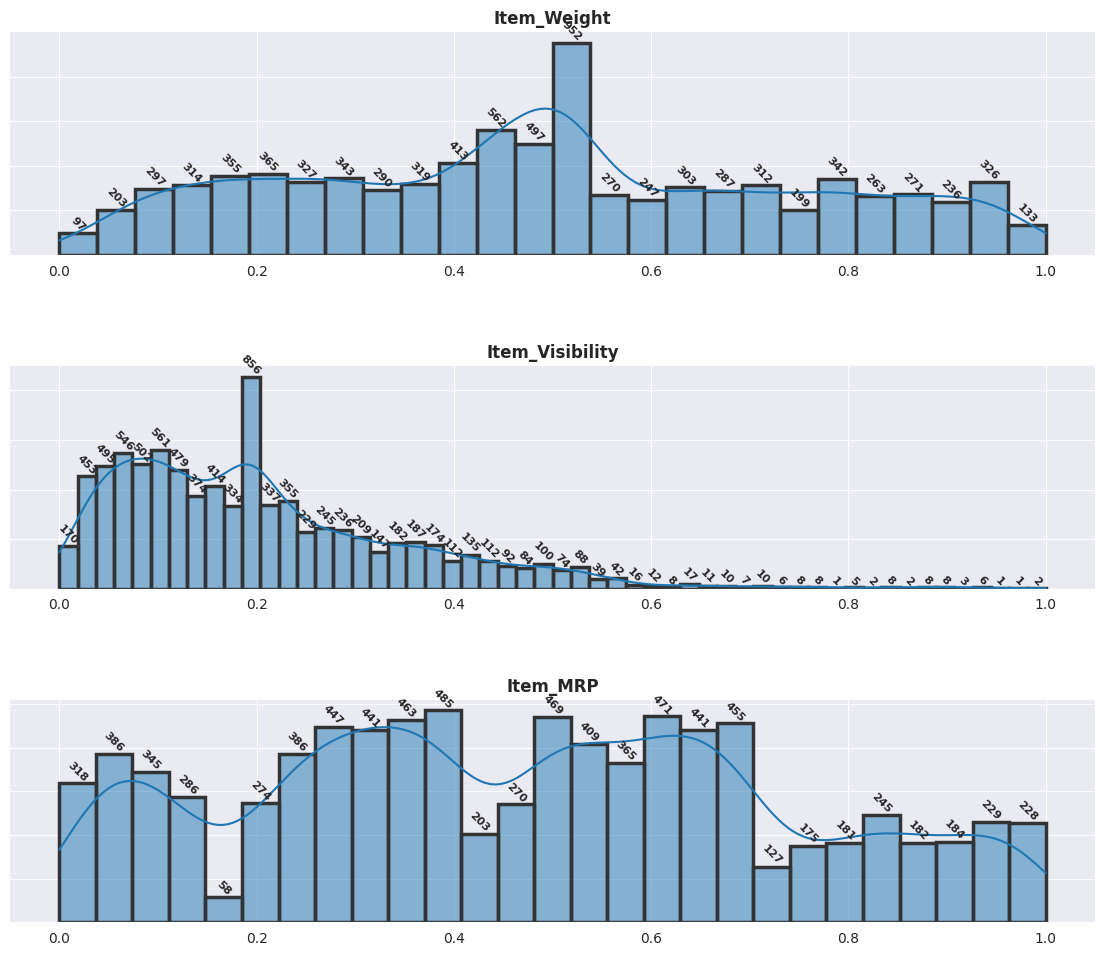

In [195]:
fig, axes = plt.subplots(3,1, figsize=(14,10))

fig.subplots_adjust(hspace=.5,top =1, wspace=.175)

for ax, col in zip(axes.flat,col):
    sns.histplot(data=df_train, x=col,ax=ax,linewidth=2.5, edgecolor=".2",kde=True)
    ax.spines[['top','left','right']].set_visible(False)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.tick_params(labelleft=False, left=False,labelsize=10)
    ax.set_title(col,fontweight="bold")
    for i in ax.containers:
        ax.bar_label(i,fontsize=8,fontweight="bold",rotation=-45);

Categorical encoding

Procedemos a hacer el Categorical encoding.

In [196]:
print(f'Las columnas categoricas del df_train son: \n {df_train.select_dtypes(include=object).columns}')
print(f'Cantidad de variables categoricas: {len(df_train.select_dtypes(include=object).columns)}')
print('################'*5)
print(f'Las columnas categoricas del df_test son: \n {df_test.select_dtypes(include=object).columns}')
print(f'Cantidad de variables categoricas: {len(df_test.select_dtypes(include=object).columns)}')

Las columnas categoricas del df_train son: 
 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Letter_Item_Identifier'],
      dtype='object')
Cantidad de variables categoricas: 9
################################################################################
Las columnas categoricas del df_test son: 
 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Letter_Item_Identifier'],
      dtype='object')
Cantidad de variables categoricas: 9


In [197]:
#Hacemos drop de la columna Item_Identifier
df_train.drop(columns='Item_Identifier',axis=1,inplace=True)
df_test.drop(columns='Item_Identifier',axis=1,inplace=True)

In [198]:
#Outlet_Size es una variable ordinal
#Item_Fat_Content es una variable nominal dicotómica.

ordinal_encoder = OrdinalEncoder() #denota jerarquía

df_train[['Outlet_Size','Item_Fat_Content']] = ordinal_encoder.fit_transform(df_train[['Outlet_Size','Item_Fat_Content']])

df_test[['Outlet_Size','Item_Fat_Content']] = ordinal_encoder.fit_transform(df_test[['Outlet_Size','Item_Fat_Content']])



In [199]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
2.0    4798
1.0    2793
0.0     932
Name: count, dtype: int64

In [200]:
ohe = OneHotEncoder()



df_ohe = pd.DataFrame(ohe.fit_transform(df_train[['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type', 'Letter_Item_Identifier']]).toarray(),
                      columns=ohe.get_feature_names_out(['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type', 'Letter_Item_Identifier']))


df_ohe_test= pd.DataFrame(ohe.fit_transform(df_test[['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type', 'Letter_Item_Identifier']]).toarray(),
                      columns=ohe.get_feature_names_out(['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type', 'Letter_Item_Identifier']))




In [201]:
#Esta parte la hago para saber si tiene las mismas columnas

print(f'la dimensión del ohe es de: {df_ohe.shape}')
print(f'la dimensión del ohe del test es de: {df_ohe_test.shape}')

la dimensión del ohe es de: (8523, 113)
la dimensión del ohe del test es de: (5681, 113)


In [202]:
#concateno
num_cols= ['Item_Weight', 'Item_Visibility', 'Item_MRP']


df_definite = pd.concat([df_train[num_cols],df_train[['Item_Fat_Content','Outlet_Size']],df_ohe,df_train['Item_Outlet_Sales']],axis=1)

df_definite_test = pd.concat([df_test[num_cols],df_test[['Item_Fat_Content','Outlet_Size']],df_ohe_test],axis=1)

print(f'df_definite: {df_definite.shape}')
print(f'df_definite test: {df_definite_test.shape}')

df_definite: (8523, 119)
df_definite test: (5681, 118)


Correlation Matrix

In [203]:
#Con la siguiente función vamos a saber el nivel de correlación de los features
#Y vamos a eliminar el primero de estos

def correlation(dataset, threshold):
    col_corr = set()  # Set todos los nombres de las columnas correlacionadas
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # valores absolutos de la correlacion
                colname = corr_matrix.columns[i] #obtengo el valor de la columna
                col_corr.add(colname)
    return col_corr


In [204]:
corr_features=correlation(df_definite,0.60) #si las variables están correlacionadas >0.7 las eliminamos
len(set(corr_features))

15

In [205]:
corr_features #estas son las variables a eliminar



{'Outlet_Establishment_Year_1985',
 'Outlet_Establishment_Year_1987',
 'Outlet_Establishment_Year_1997',
 'Outlet_Establishment_Year_1998',
 'Outlet_Establishment_Year_1999',
 'Outlet_Establishment_Year_2002',
 'Outlet_Establishment_Year_2004',
 'Outlet_Establishment_Year_2007',
 'Outlet_Establishment_Year_2009',
 'Outlet_Identifier_OUT013',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3'}

In [206]:
df_definite.drop(corr_features,axis=1,inplace=True) #hago el drop de las variables
df_definite_test.drop(corr_features,axis=1,inplace=True)

In [207]:
#acá veo como están correlacionados con el target del dataset

correlation=df_definite.corr()['Item_Outlet_Sales']

sorted_correlation = correlation.abs().sort_values(ascending=False)

print(sorted_correlation)

Item_Outlet_Sales             1.000000
Item_MRP                      0.567574
Outlet_Identifier_OUT027      0.311192
Outlet_Identifier_OUT010      0.284883
Outlet_Identifier_OUT019      0.277250
                                ...   
Letter_Item_Identifier_DRZ    0.000775
Letter_Item_Identifier_DRI    0.000602
Letter_Item_Identifier_NCV    0.000540
Letter_Item_Identifier_DRG    0.000366
Letter_Item_Identifier_NCJ    0.000167
Name: Item_Outlet_Sales, Length: 104, dtype: float64


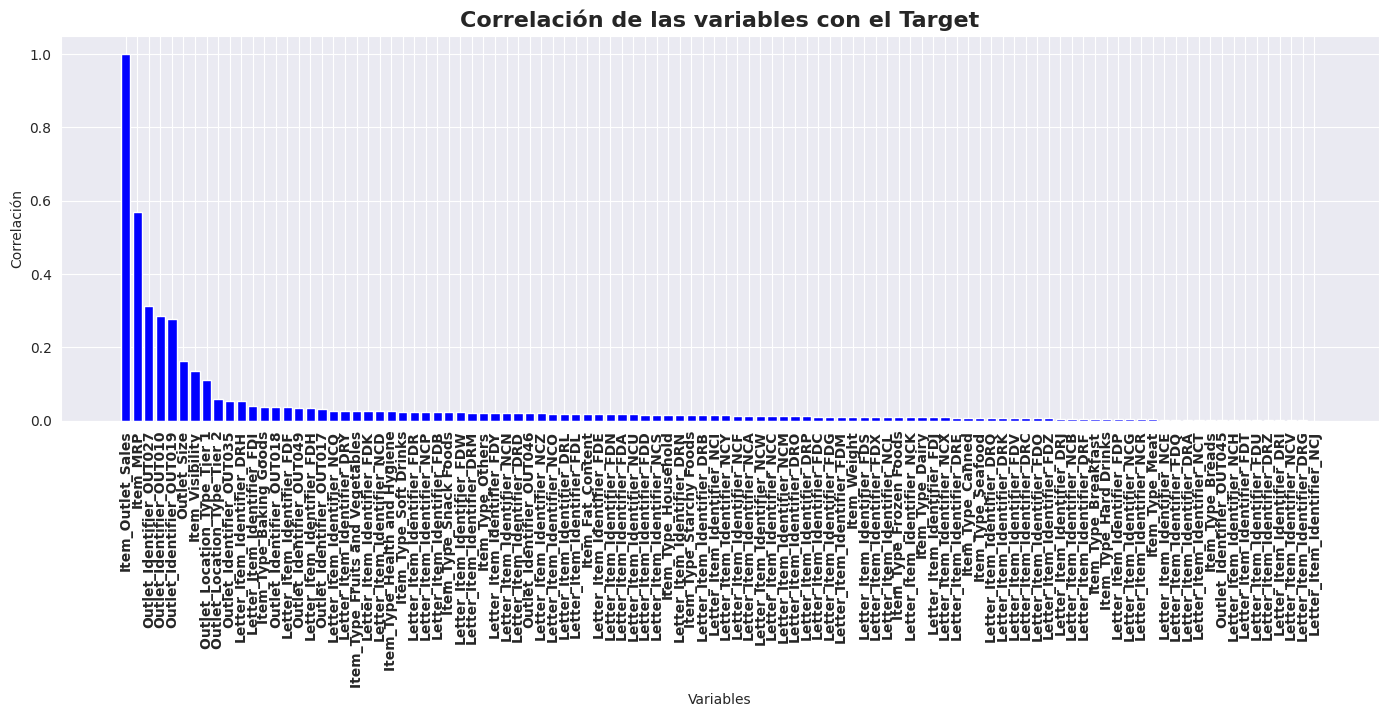

In [229]:
plt.figure(figsize=(17, 5))
plt.title('Correlación de las variables con el Target',size=16,fontweight='bold')
plt.bar(sorted_correlation.index, sorted_correlation,color='blue')
plt.xticks(rotation=90,size=10,fontweight='bold')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.show()

In [209]:
# Obtener las 70 variables con menor correlación
variables_a_eliminar = sorted_correlation.tail(70).index

# Eliminar las variables del DataFrame
df_definite = df_definite.drop(variables_a_eliminar, axis=1)

df_definite_test = df_definite_test.drop(variables_a_eliminar, axis=1)

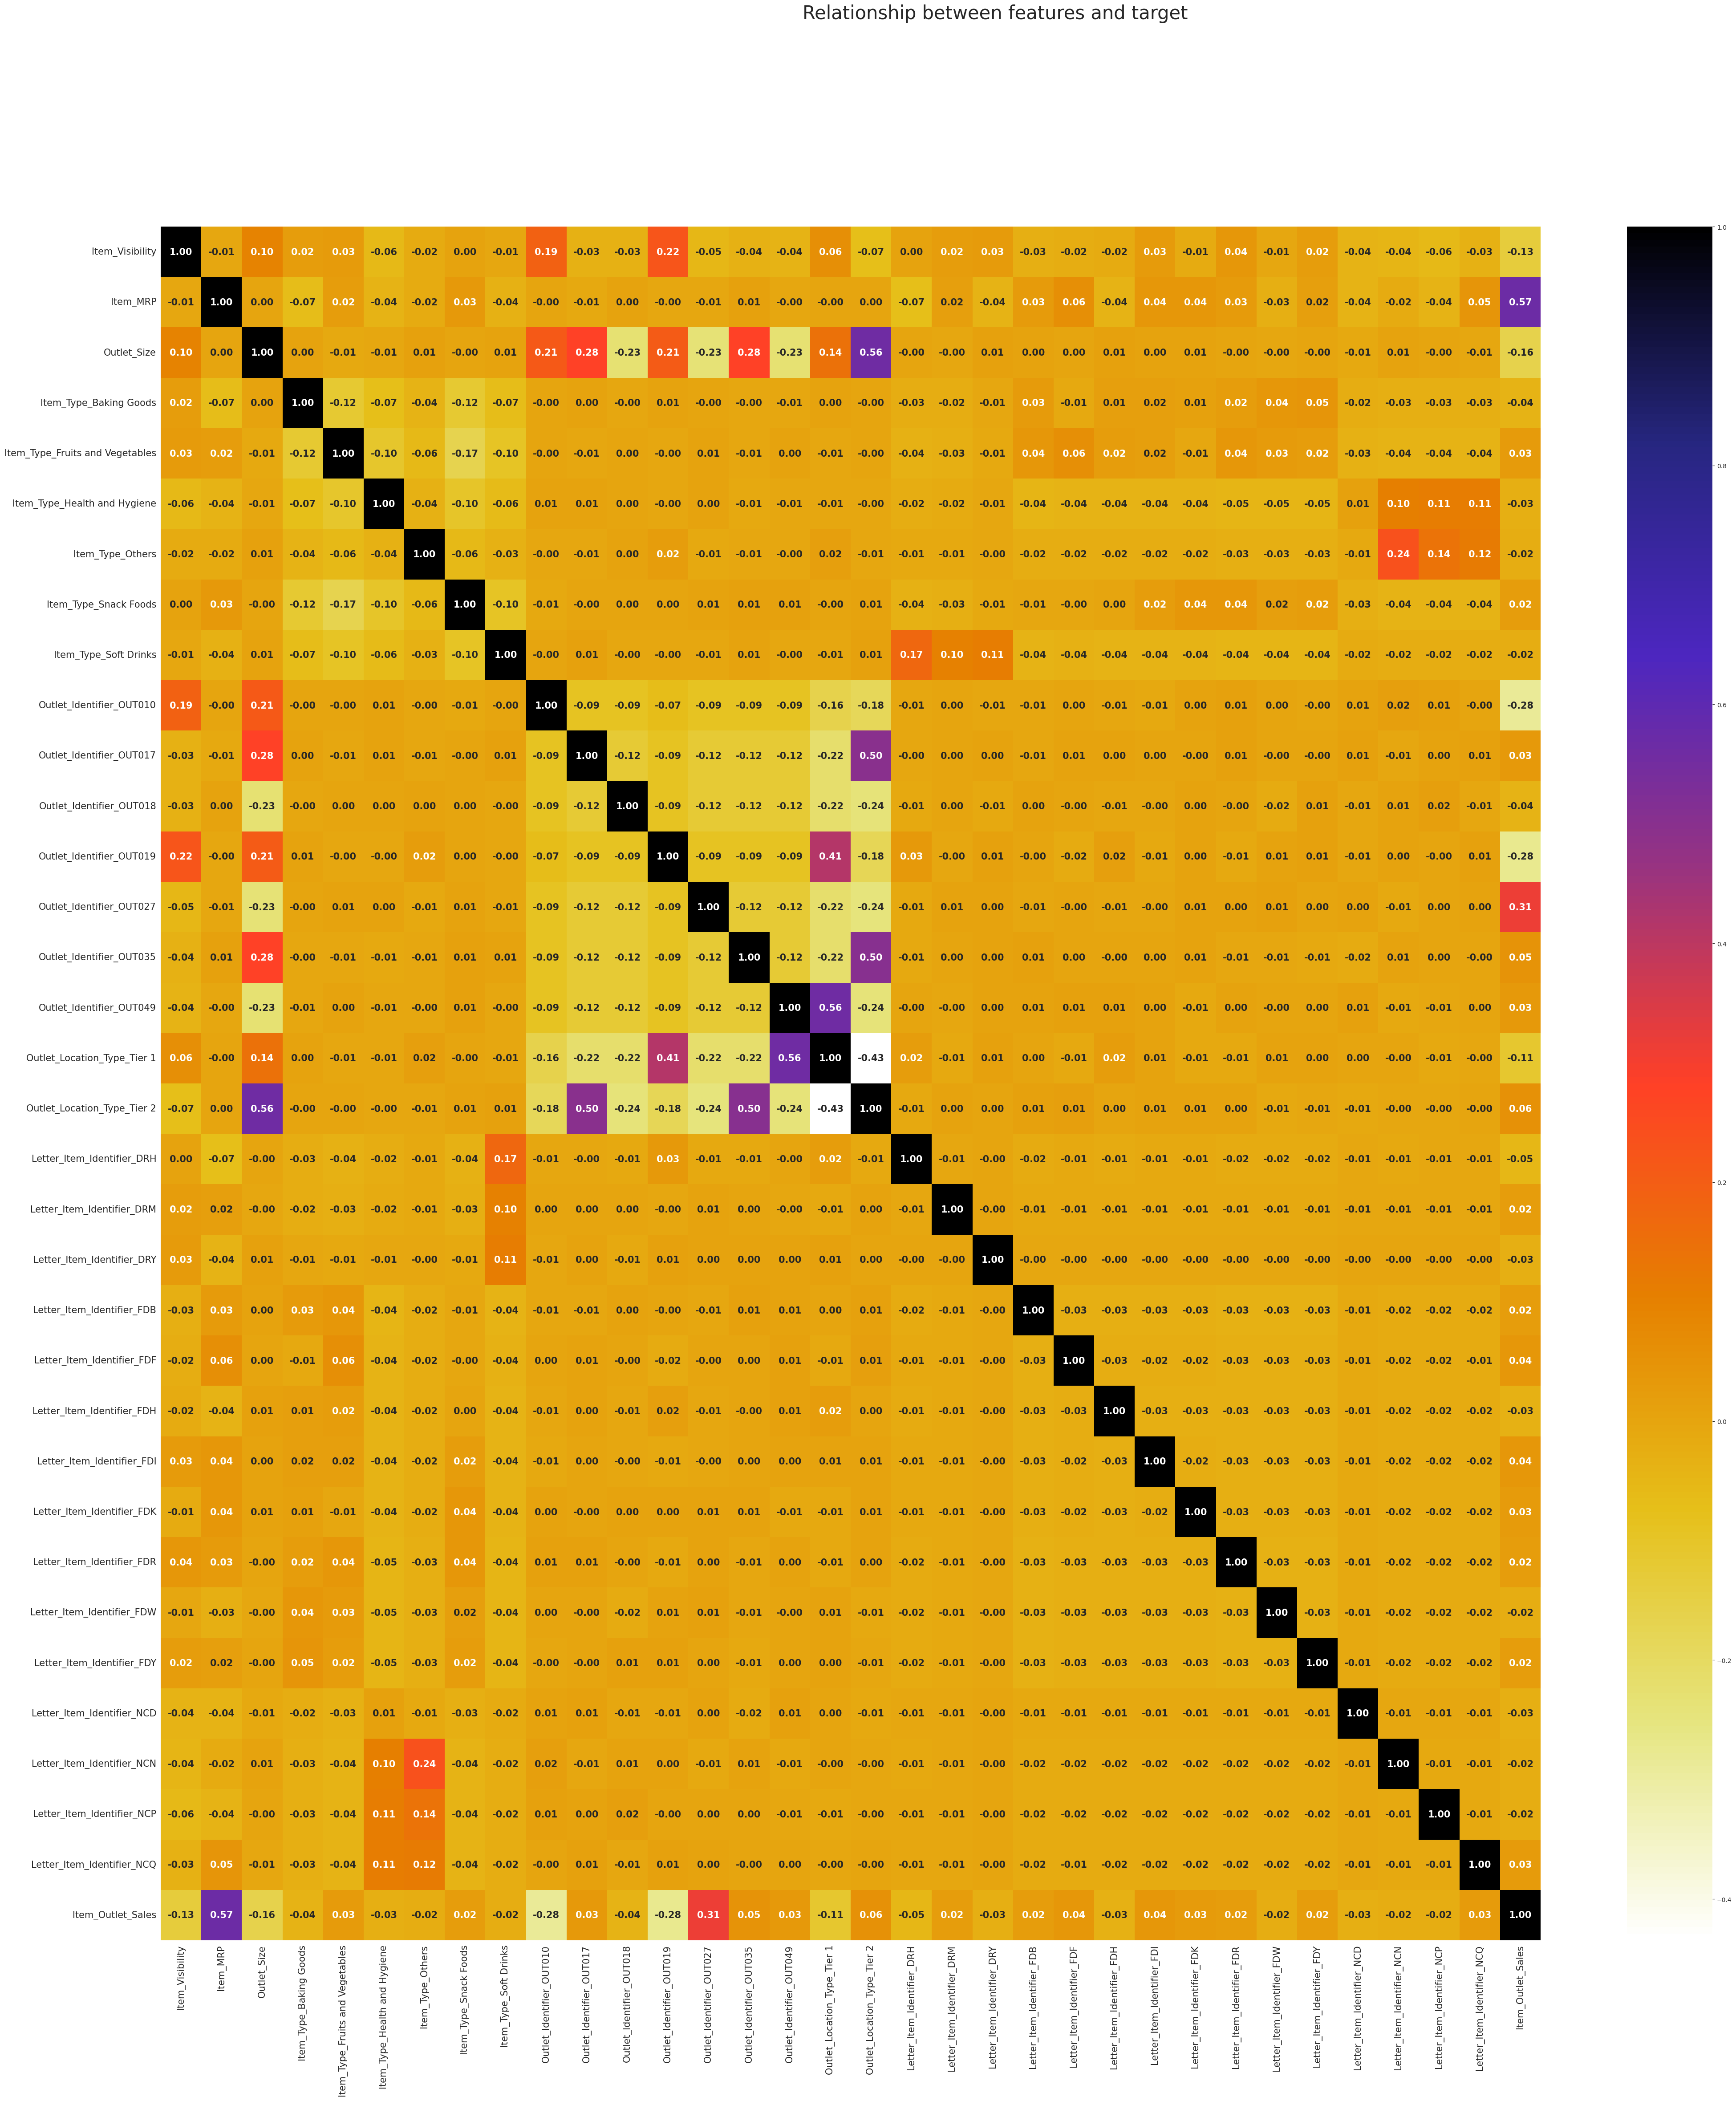

In [210]:
#Looking at the Multicolinearity and the relationship between Features and target
fig, ax= plt.subplots(figsize=(50,50))
sns.heatmap(df_definite.corr(),annot=True,annot_kws={'size': 15,'weight': 'bold'},cmap='CMRmap_r',fmt=".2f")
plt.suptitle("Relationship between features and target",size=30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


plt.show()



In [211]:
y= df_definite['Item_Outlet_Sales']

X= df_definite.drop(columns='Item_Outlet_Sales',axis=1)


In [212]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [213]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1704, 33)
(1704,)
(6819, 33)
(6819,)


In [214]:
#model
LR = LinearRegression()

#fit
LR.fit(X_train, y_train)

#predict
y_predict = LR.predict(X_val)

#score variables
#Mean Absolute Error= la media de la diferencia entre y - ypred
LR_MAE = round(MAE(y_val, y_predict),2)
#Mean Squared Error= 1/n(y-pred)**2
LR_MSE = round(MSE(y_val, y_predict),2)
#Root Mean Squared Error
RMSE = sqrt(MSE(y_val, y_predict))
#Coeficiente de determinacion == valor 1 mejor prediccion, valor 0 peor prediccion
LR_R_2 = round(R2(y_val, y_predict),4)



print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f'Root Mean Squared error:{RMSE}\n')
print(f" R^2 Score: {LR_R_2}\n")




 Mean Absolute Error: 856.07

 Mean Squared Error: 1331112.7

Root Mean Squared error:1153.7385745445542

 R^2 Score: 0.5437



In [215]:
print(f'el Coeficiente de la regresión lineal múltiple es de: {LR.coef_}')
print(f'el Intercept de la regresión lineal múltiple es de {LR.intercept_} ')

el Coeficiente de la regresión lineal múltiple es de: [-7.05914487e+01  3.55614087e+03  1.52589819e+16  1.11125635e+02
  1.35512715e+02  1.47160146e+02 -2.24035692e+02  1.45428292e+02
 -4.27312724e+02 -3.05179638e+16  2.11865369e+02 -1.52589819e+16
 -1.77965232e+03 -1.52589819e+16  3.71722161e+02  1.52589819e+16
 -3.05179638e+16 -3.05179638e+16 -1.65932219e+02  9.42623998e+02
 -1.84835777e+03 -9.56953537e+01 -3.87129875e+02 -5.21263791e+01
  3.24110754e+02 -1.43633811e+02  6.60006096e+01  1.79361798e+02
  5.74448109e+02 -6.74607500e+02 -1.13271472e+02  3.86153585e+02
  5.09564514e+02]
el Intercept de la regresión lineal múltiple es de 669.1564680132369 


In [220]:
lr_predict = LR.predict(df_definite_test) #respuesta con linear regression
lr_predict

array([2056.5182659 , 1588.5182659 , 1347.88499624, ..., 1813.15646801,
       3333.15646801, 1069.15646801])

Otros modelos:

In [232]:
estimadores={
    'Lasso':Lasso(alpha=1.0),
    'Ridge':Ridge(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5)}

for name, estimador in estimadores.items():
    estimador.fit(X_train,y_train)
    predictions = estimador.predict(X_val)

    print("="*32)
    print(name)
    
    #score variables
    #Mean Absolute Error= la media de la diferencia entre y - ypred
    MAE_coef = round(MAE(y_val, predictions),2)
    print(f'MAE:{MAE_coef}')
    #Mean Squared Error= 1/n(y-pred)**2
    MSE_coef = round(MSE(y_val, predictions),2)
    print(f'Mean squared Error: {MSE_coef}')
    #Root Mean Squared Error
    RMSE_coef = sqrt(MSE(y_val, predictions))
    print(f'Root Mean squared Error: {RMSE_coef}')
    #Coeficiente de determinacion == valor 1 mejor prediccion, valor 0 peor prediccion
    p_2 = round(R2(y_val, predictions),4)
    print(f'R 2 Score: {p_2}')


Lasso
MAE:839.68
Mean squared Error: 1285921.28
Root Mean squared Error: 1133.9846890891
R 2 Score: 0.5592
Ridge
MAE:842.79
Mean squared Error: 1291629.22
Root Mean squared Error: 1136.4986670833744
R 2 Score: 0.5573
ElasticNet
MAE:1228.47
Mean squared Error: 2466207.79
Root Mean squared Error: 1570.416439126482
R 2 Score: 0.1547


In [218]:
lasso = Lasso() #Lasso es el mejor modelo de estos,vamos a tunear hyperparameters con GridSearch
                #Podría hacerlo con un for loop, pero así me parece más rápido.

# Defino los valores posibles para los hiperparámetros
param_grid = {'alpha': [0.1, 1.0, 10.0,100.0],
              'max_iter': [10000,100000]}

# búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# mejor modelo para hacer predicciones
predictions_cv = best_model.predict(X_val)

#score variables
#Mean Absolute Error= la media de la diferencia entre y - ypred
lasso_MAE = round(MAE(y_val, predictions_cv),2)
#Mean Squared Error= 1/n(y-pred)**2
lasso_MSE = round(MSE(y_val, predictions_cv),2)
#Root Mean Squared Error
lasso_RMSE = sqrt(MSE(y_val, predictions_cv))
#Coeficiente de determinacion == valor 1 mejor prediccion, valor 0 peor prediccion
lasso_R_2 = round(R2(y_val, predictions_cv),4)



print(f" Mean Absolute Error: {lasso_MAE}\n")
print(f" Mean Squared Error: {lasso_MSE}\n")
print(f'Root Mean Squared error:{lasso_RMSE}\n')
print(f" R^2 Score: {lasso_R_2}\n")


 Mean Absolute Error: 836.61

 Mean Squared Error: 1290629.6

Root Mean Squared error:1136.0587995680312

 R^2 Score: 0.5576



In [225]:
#predicciones con el val score comparadas

val_df = pd.DataFrame({'y_validacion':y_val,'lr_val_pred':y_predict,'lasso_val_pred':predictions_cv})
val_df

y_validacion  lr_val_pred  lasso_val_pred
4931     1426.1436  2429.156468     2500.229456
4148     1201.7690  1990.026593     2459.607286
7423     1836.2764  2205.156468     2053.896530
4836     2410.8618  2253.156468     2254.728283
944      1549.9824  3224.302026     3071.257893
...            ...          ...             ...
5517     4146.6024  3689.156468     3531.892711
7820      649.8208  1429.156468     1300.971529
3406     2050.6640  1661.156468     1660.834896
6538     1149.8366  1607.461114     1503.528876
8227      341.5554   665.156468      777.261565

[6819 rows x 3 columns]

In [219]:
predicciones_finales = best_model.predict(df_definite_test)
predicciones_finales

array([1816.81628516, 1414.84778207, 2146.44689377, ..., 1885.96742717,
       3323.39193152, 1302.04904779])

In [224]:
df = pd.DataFrame({'predicciones_lr':lr_predict,'predicciones_lasso':predicciones_finales}) #predicciones con respecto al test set

df

predicciones_lr  predicciones_lasso
0         2056.518266         1816.816285
1         1588.518266         1414.847782
2         1347.884996         2146.446894
3         2585.156468         2430.036391
4         5345.604577         4995.100238
...               ...                 ...
5676      2321.461114         2224.363630
5677      2511.156468         2464.914701
5678      1813.156468         1885.967427
5679      3333.156468         3323.391932
5680      1069.156468         1302.049048

[5681 rows x 2 columns]

In [227]:
df.to_csv('./csv files/respuestas.csv',encoding='utf-8', index=False)

Variables que podrían mejorar el análisis:

* Ubicación (Tanto por el nivel adquisitivo, como por ejemplo si es cercano al mar sería una buena variable para analizar la venta de pescado).
* Cercanía de negocios similares a menor a 20 cuadras.
* ¿Hay promociones?
* Cantidad de productos competidores(Coca-Pepsi)
* ¿Situación económica del país?
* ¿Cantidad de ventas totales de todos los productos del Outlet?